In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from scipy import stats
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pingouin as pg
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [3]:
df = pd.read_csv("data/student-por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1) school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2) sex - student's sex (binary: 'F' - female or 'M' - male)
3) age - student's age (numeric: from 15 to 22)
4) address - student's home address type (binary: 'U' - urban or 'R' - rural)
5) famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6) Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7) Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8) Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9) Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10) Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11) reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12) guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13) traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14) studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15) failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16) schoolsup - extra educational support (binary: yes or no)
17) famsup - family educational support (binary: yes or no)
18) paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19) activities - extra-curricular activities (binary: yes or no)
20) nursery - attended nursery school (binary: yes or no)
21) higher - wants to take higher education (binary: yes or no)
22) internet - Internet access at home (binary: yes or no)
23) romantic - with a romantic relationship (binary: yes or no)
24) famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25) freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26) goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27) Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28) Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29) health - current health status (numeric: from 1 - very bad to 5 - very good)
30) absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31) G1 - first period grade (numeric: from 0 to 20)
32) G2 - second period grade (numeric: from 0 to 20)
33) G3 - final grade (numeric: from 0 to 20, output target)

In [5]:
len(df)

649

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [12]:
df['sex'].replace({'M': 0, 'F': 1}, inplace=True)
df['school'].replace({'GP': 0, 'MS': 1}, inplace=True)
df['address'].replace({'U': 0, 'R': 1}, inplace=True)
df['famsize'].replace({'LE3': 0, 'GT3': 1}, inplace=True)
df['Pstatus'].replace({'T': 0, 'A': 1}, inplace=True)
df['Mjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}, inplace=True)
df['Fjob'].replace({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}, inplace=True)
df['reason'].replace({'course': 0, 'reputation': 1, 'home': 2, 'other': 3}, inplace=True)
df['guardian'].replace({'mother': 0, 'father': 1, 'other': 2}, inplace=True)
df['schoolsup'].replace({'yes': 1, 'no': 0}, inplace=True)
df['famsup'].replace({'yes': 1, 'no': 0}, inplace=True)
df['paid'].replace({'yes': 1, 'no': 0}, inplace=True)
df['activities'].replace({'yes': 1, 'no': 0}, inplace=True)
df['nursery'].replace({'yes': 1, 'no': 0}, inplace=True)
df['higher'].replace({'yes': 1, 'no': 0}, inplace=True)
df['internet'].replace({'yes': 1, 'no': 0}, inplace=True)
df['romantic'].replace({'yes': 1, 'no': 0}, inplace=True)

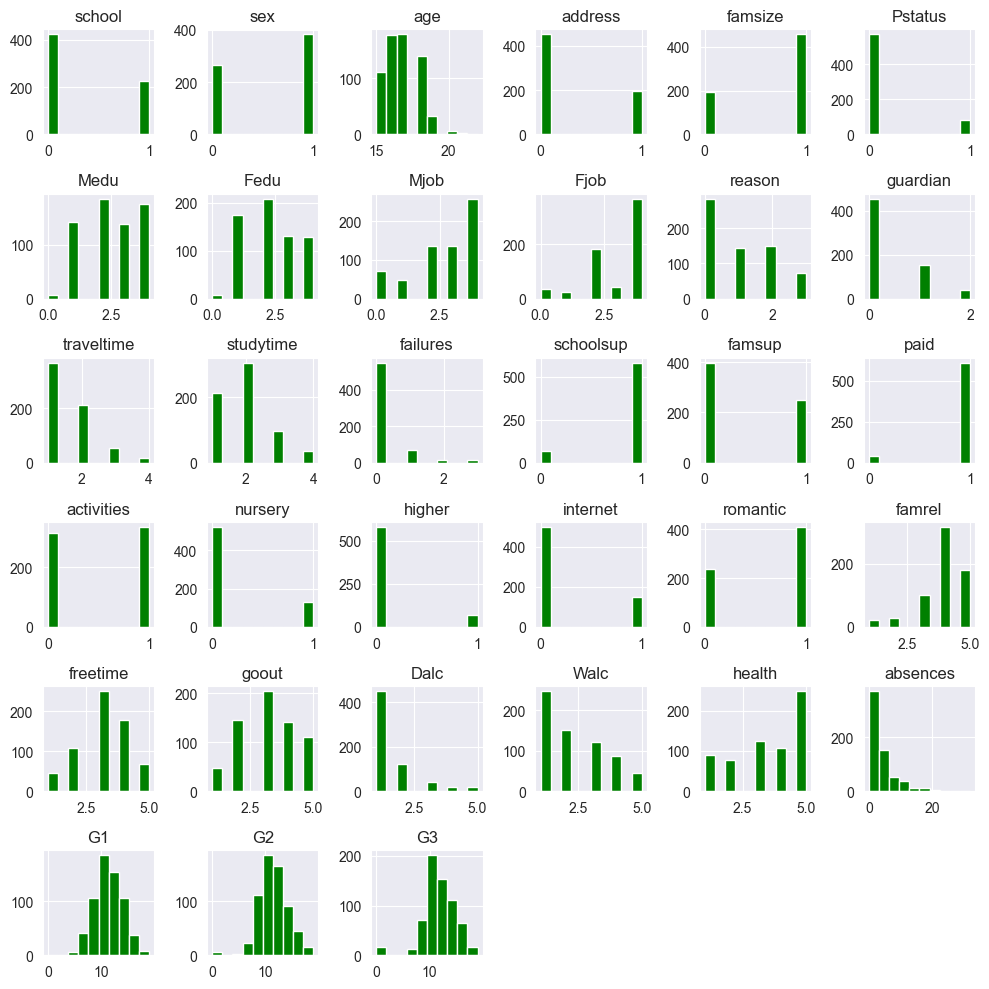

In [22]:
df.hist(figsize=(10, 10), color='green')
categorical_cols = df.select_dtypes(include=['category']).columns

for col in categorical_cols:
    plt.figure(figsize=(3, 3))
    sns.countplot(x=df[col], color='green')
    plt.title(f'Bar plot for {col}')
    
plt.tight_layout()
plt.show()

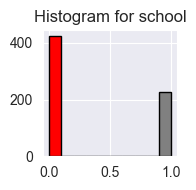

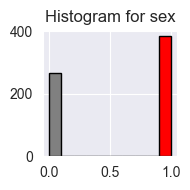

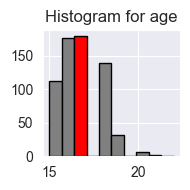

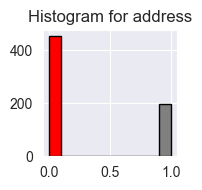

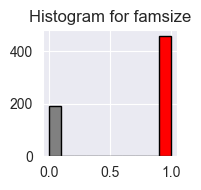

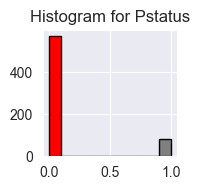

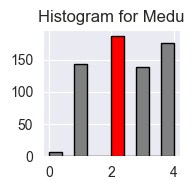

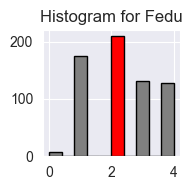

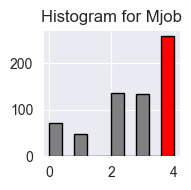

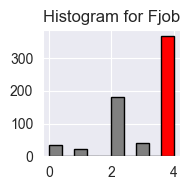

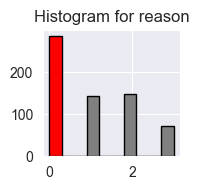

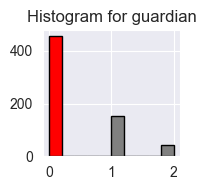

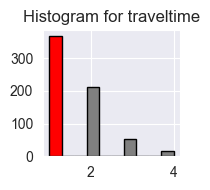

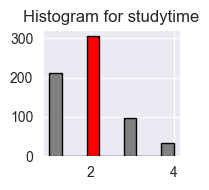

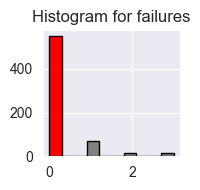

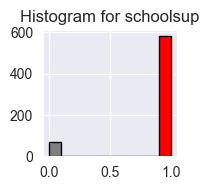

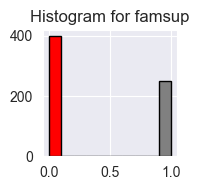

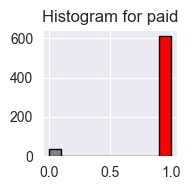

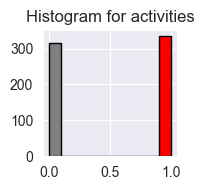

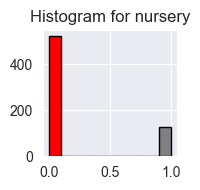

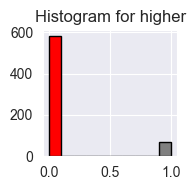

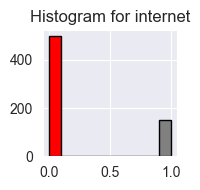

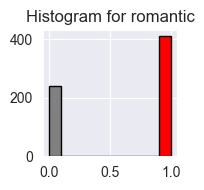

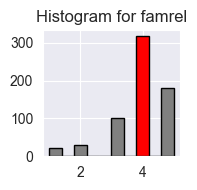

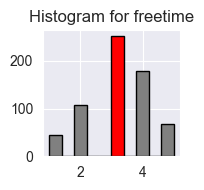

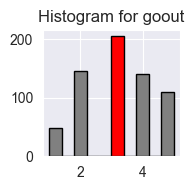

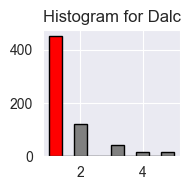

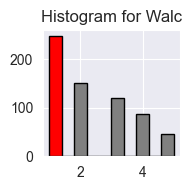

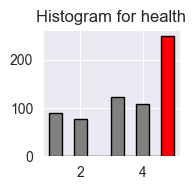

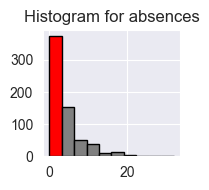

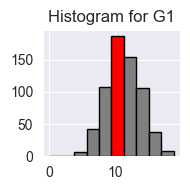

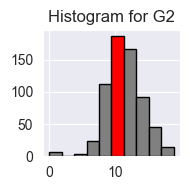

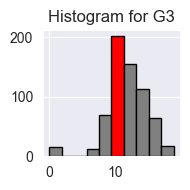

In [23]:
for col in df.select_dtypes(include=['float64', 'int64','category']).columns:
    plt.figure(figsize=(2, 2))
    counts, bins, patches = plt.hist(df[col], color='grey', edgecolor='black')


    max_freq_index = np.argmax(counts)

    patches[max_freq_index].set_fc('red')

    plt.title(f'Histogram for {col}')
    plt.tight_layout()
    plt.show()

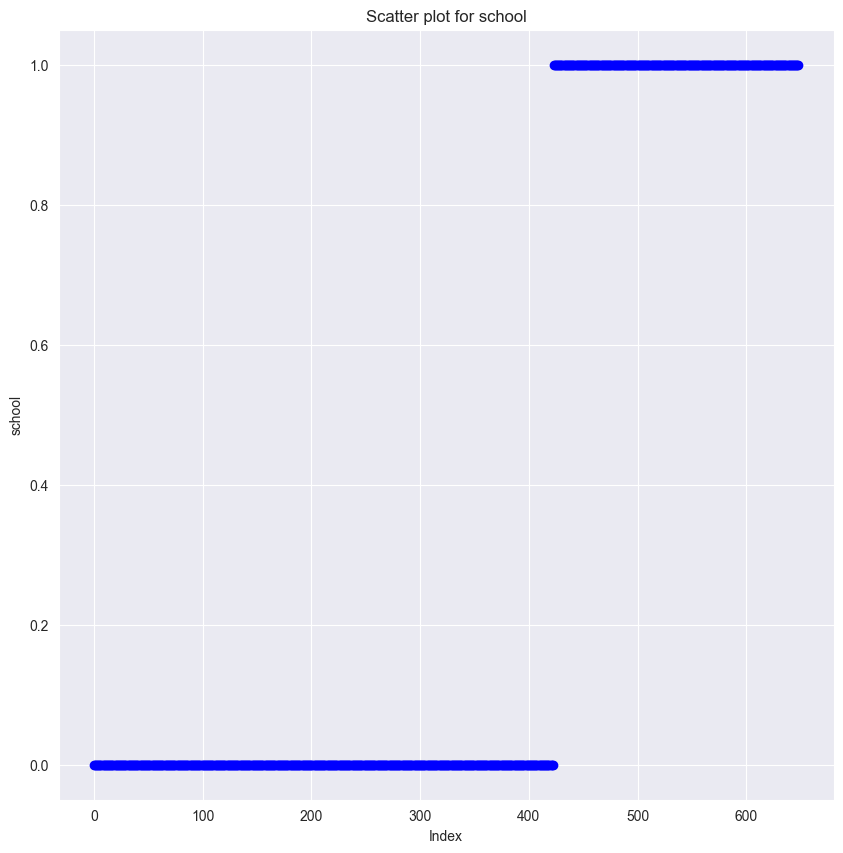

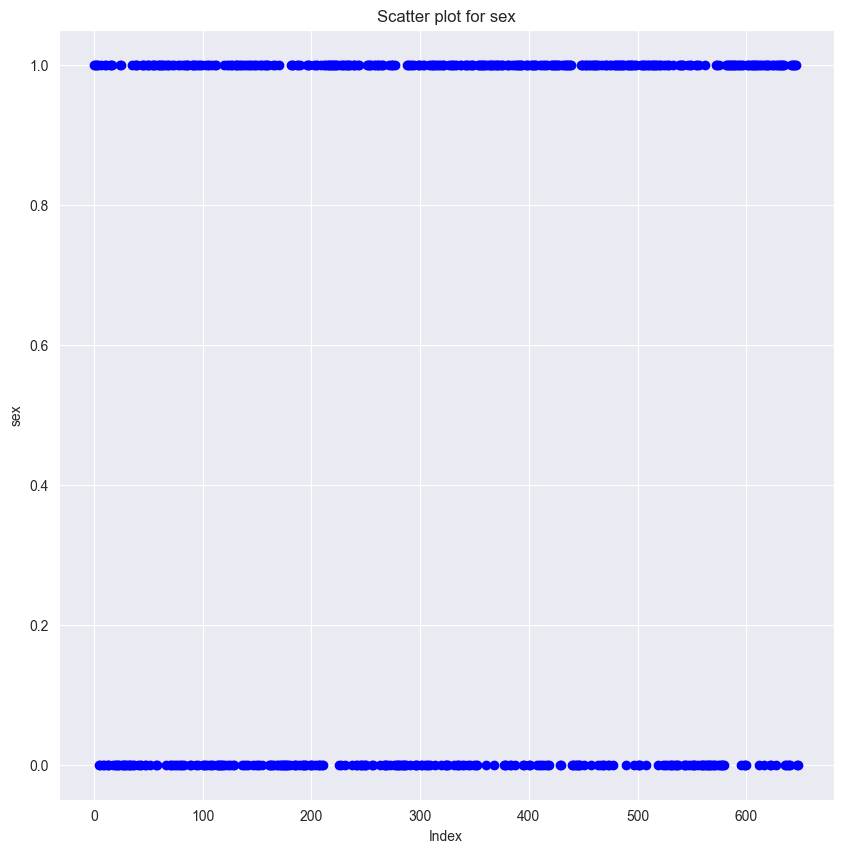

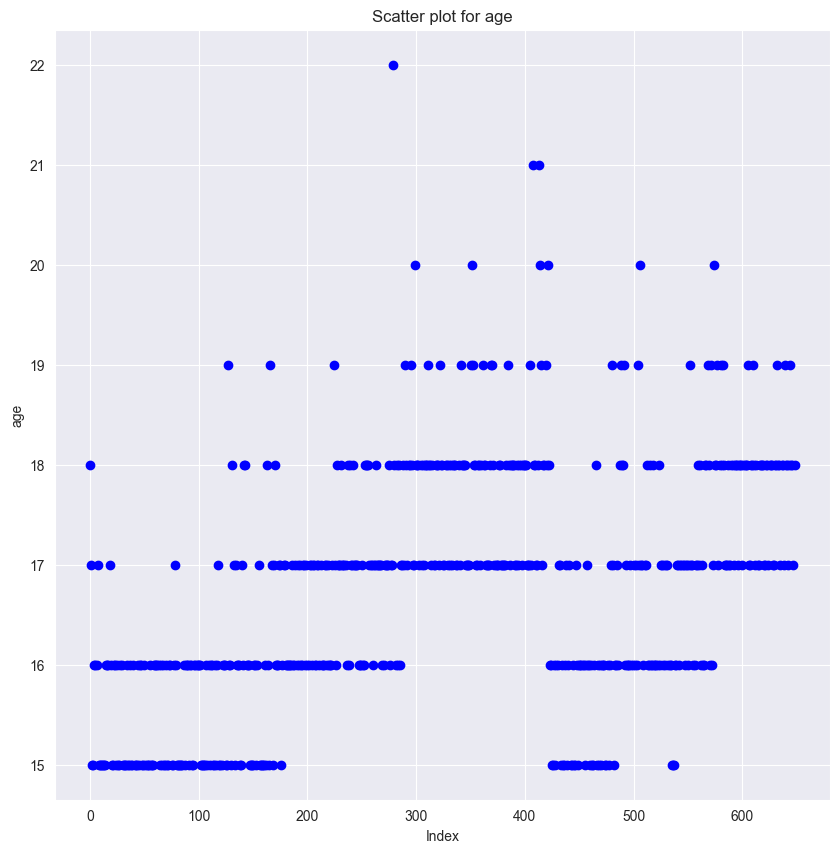

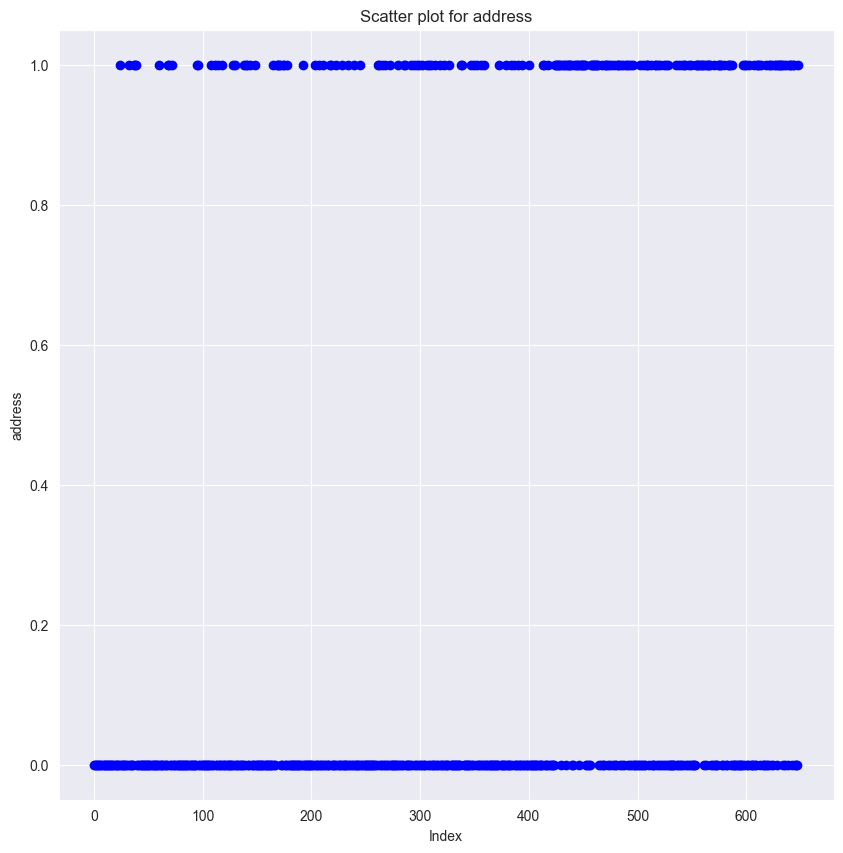

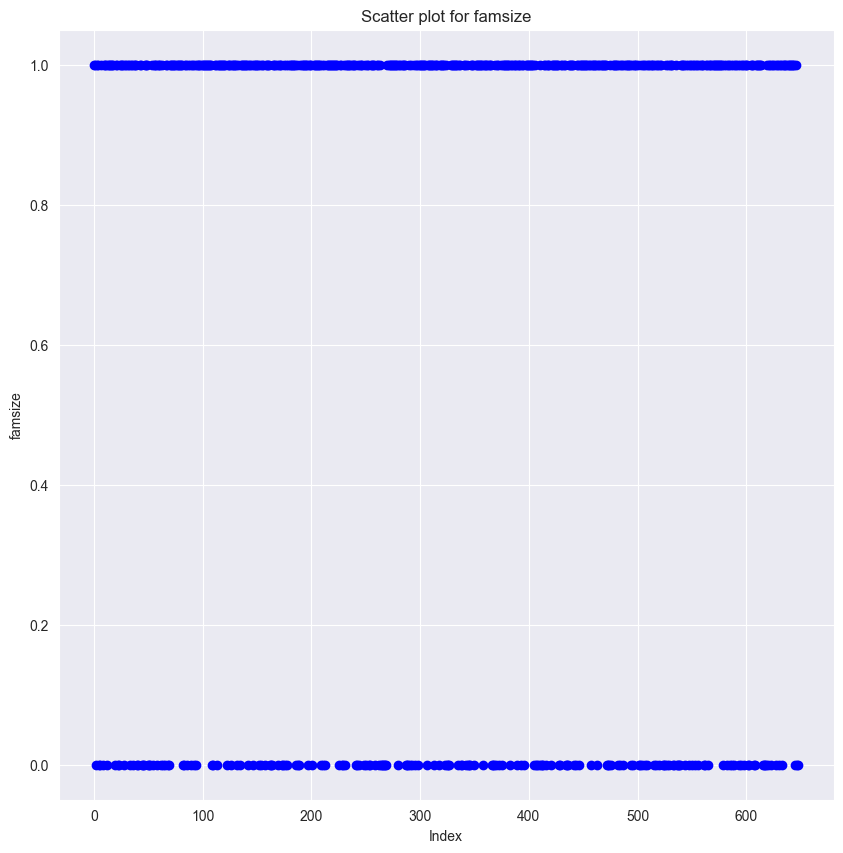

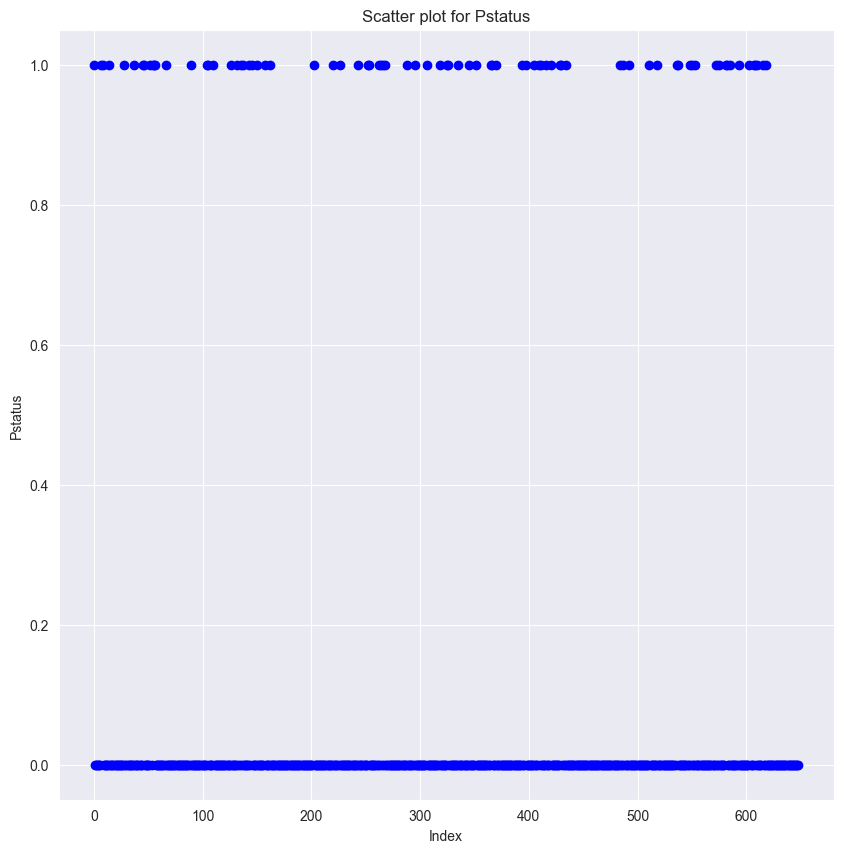

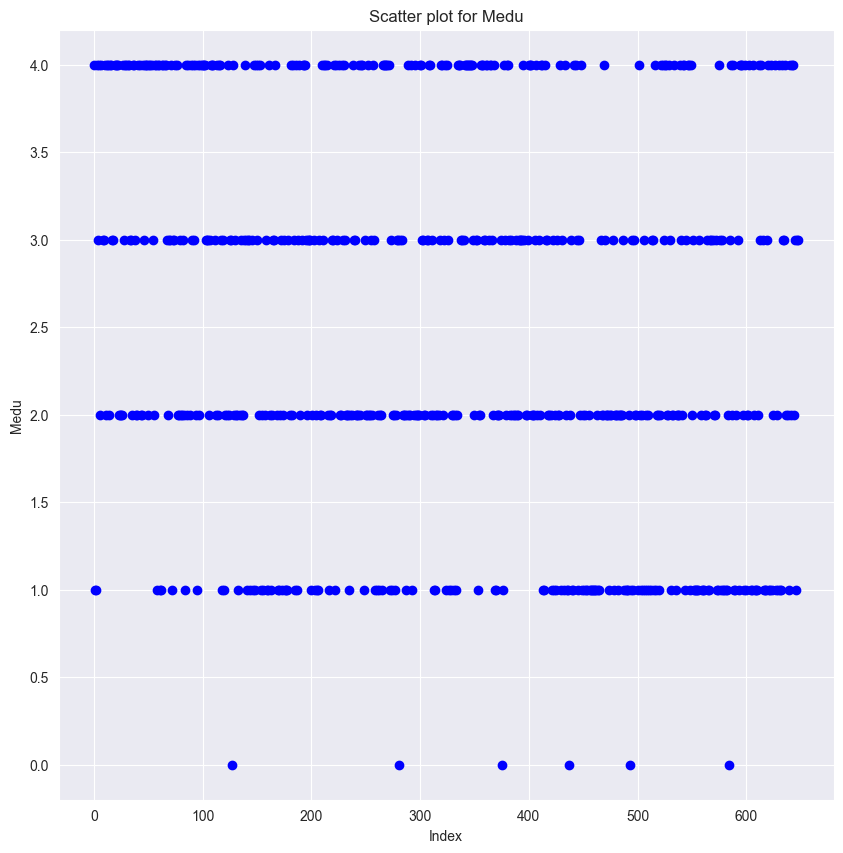

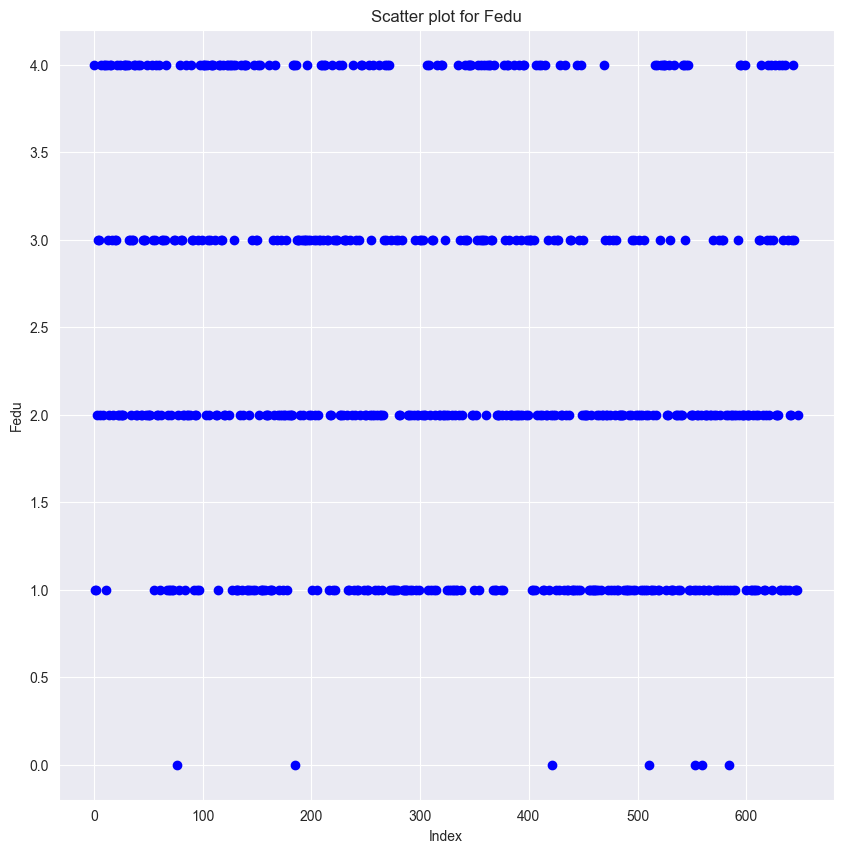

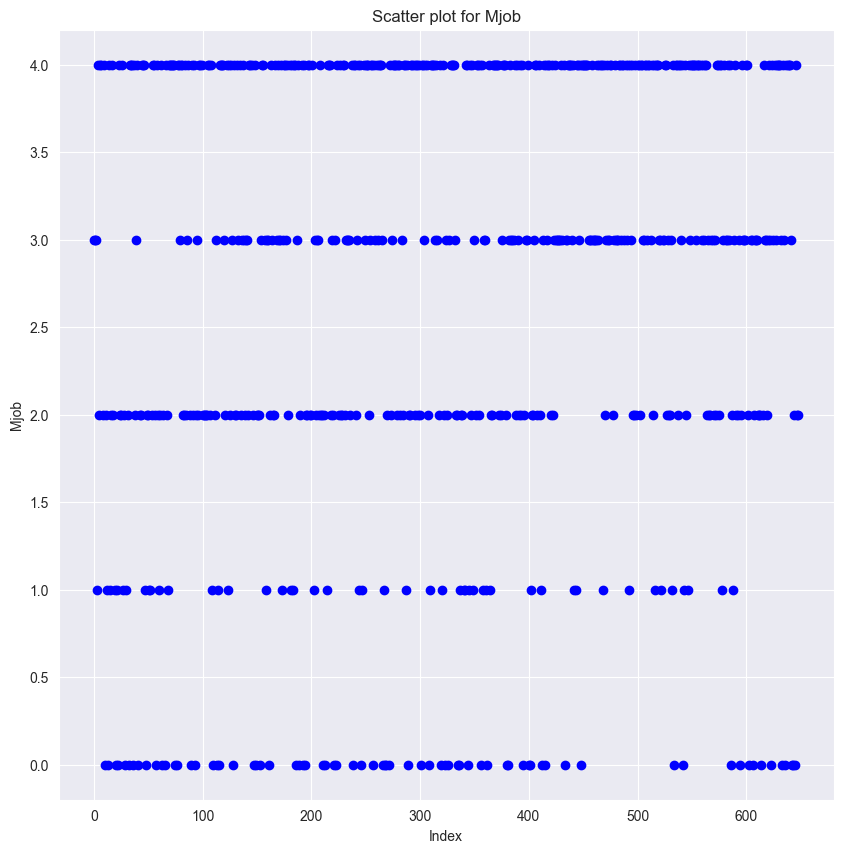

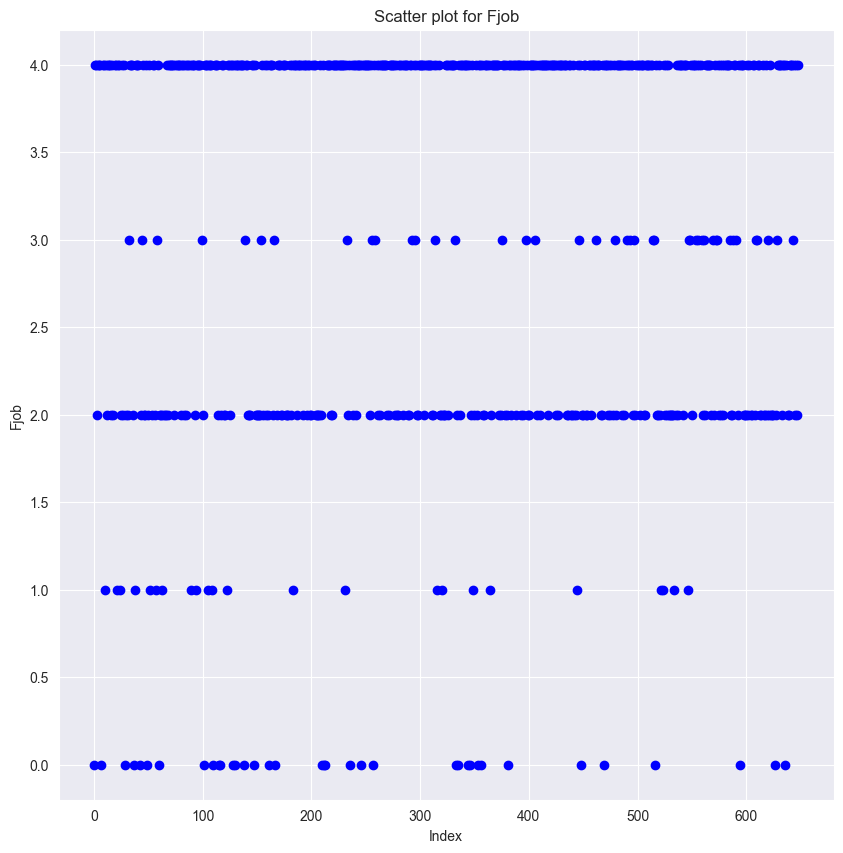

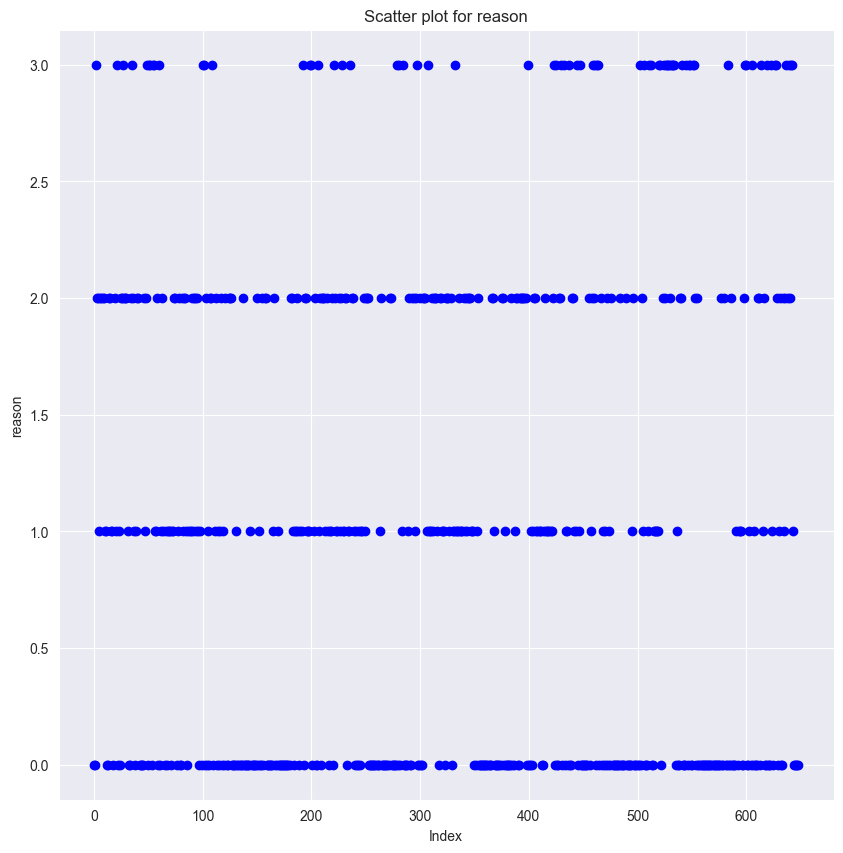

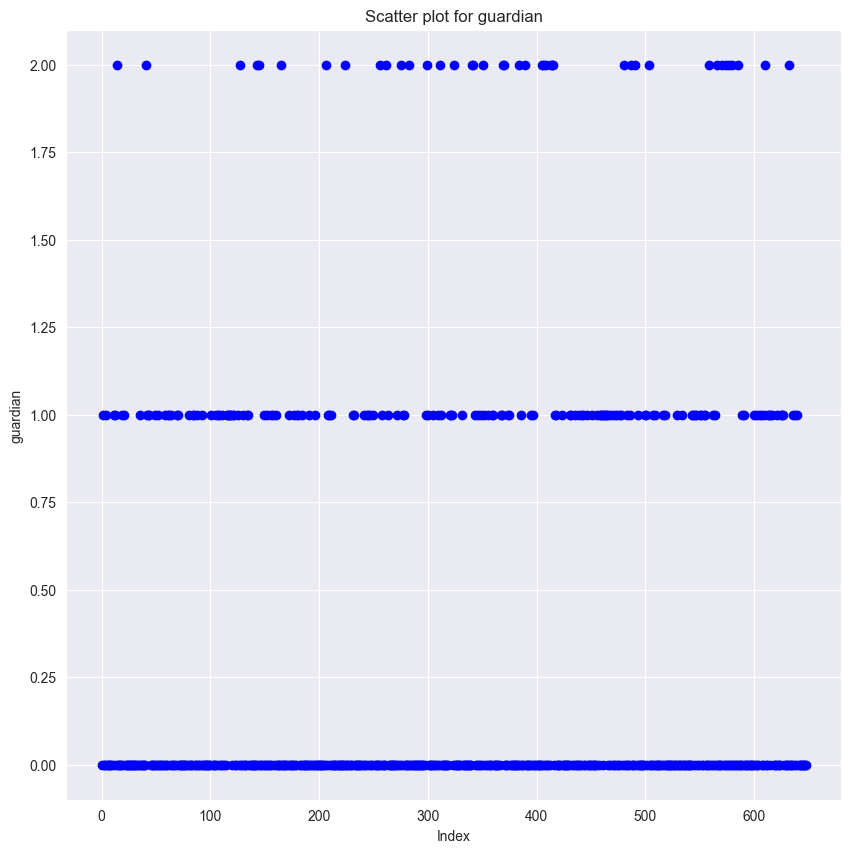

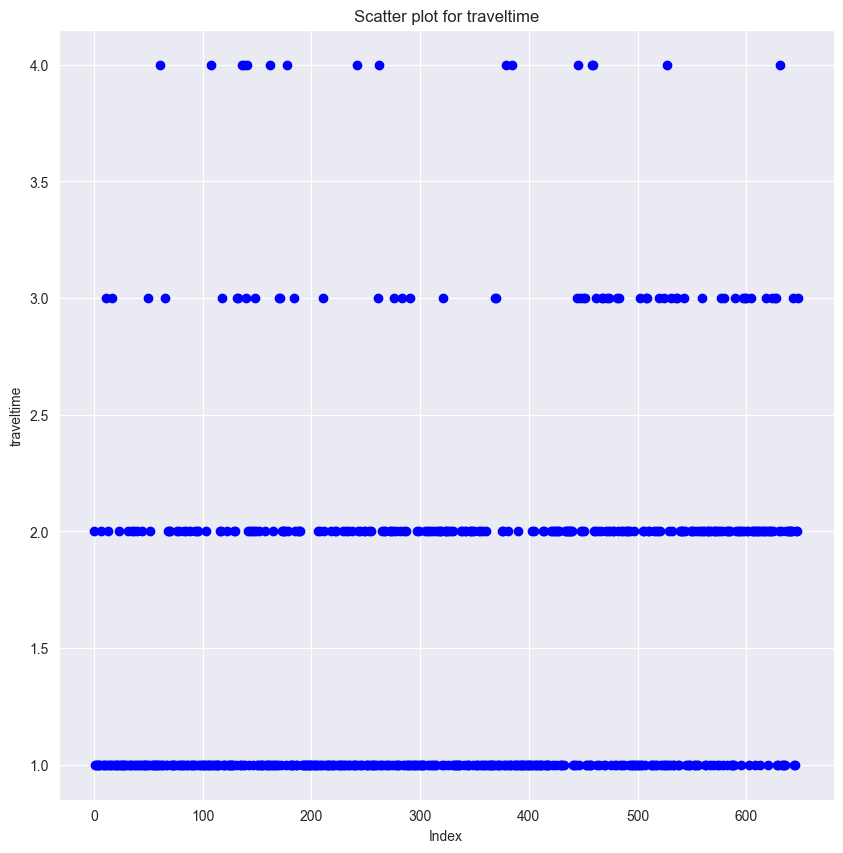

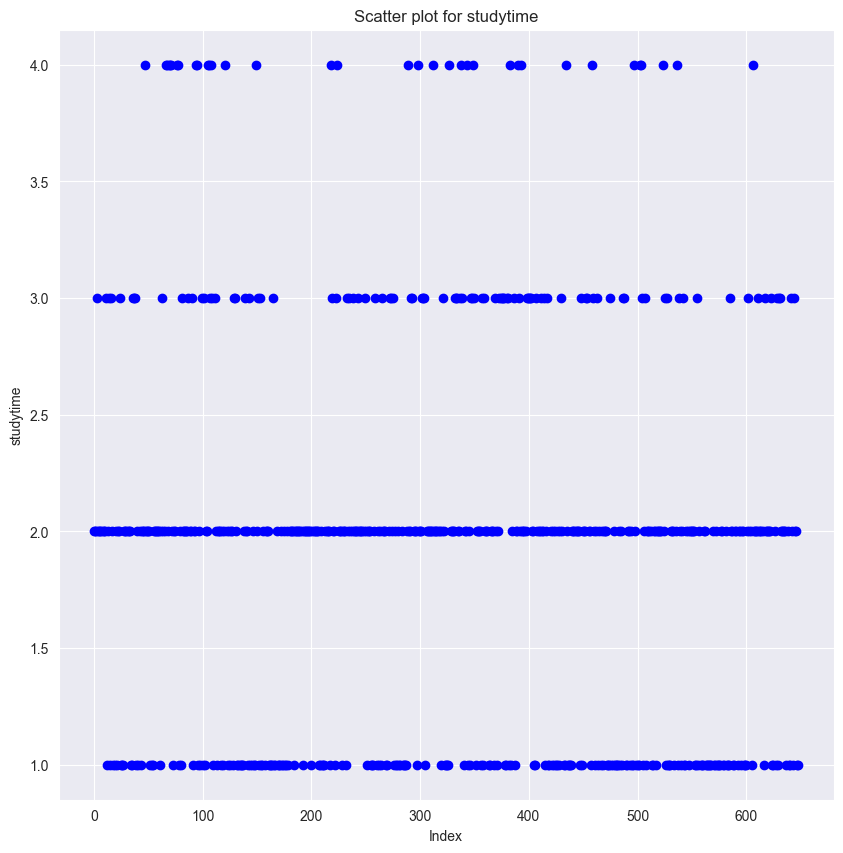

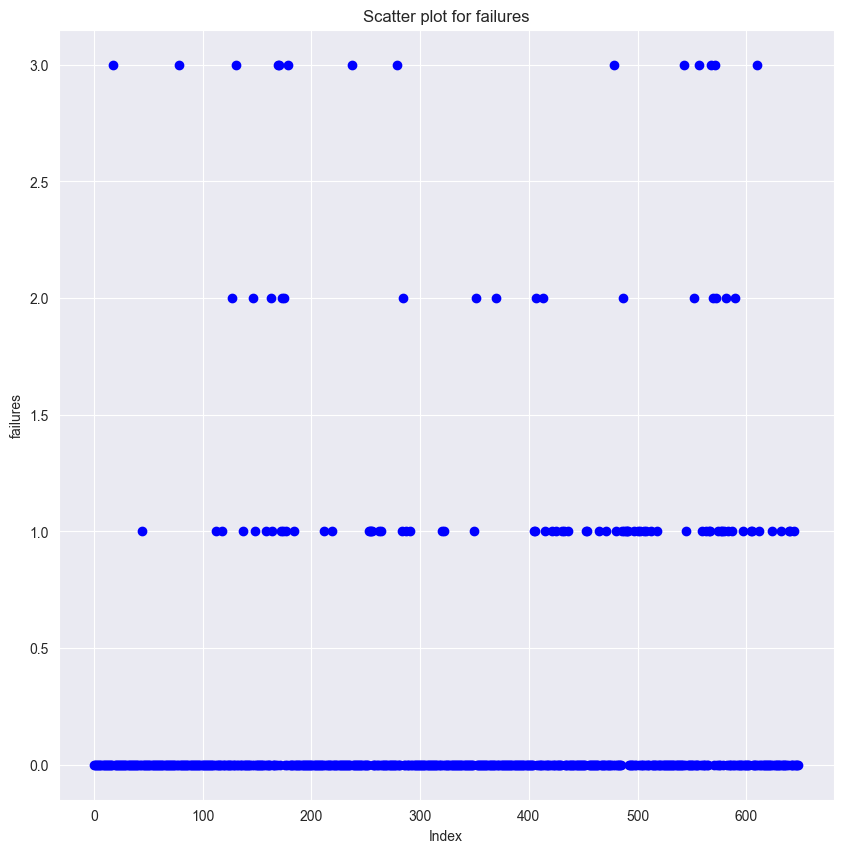

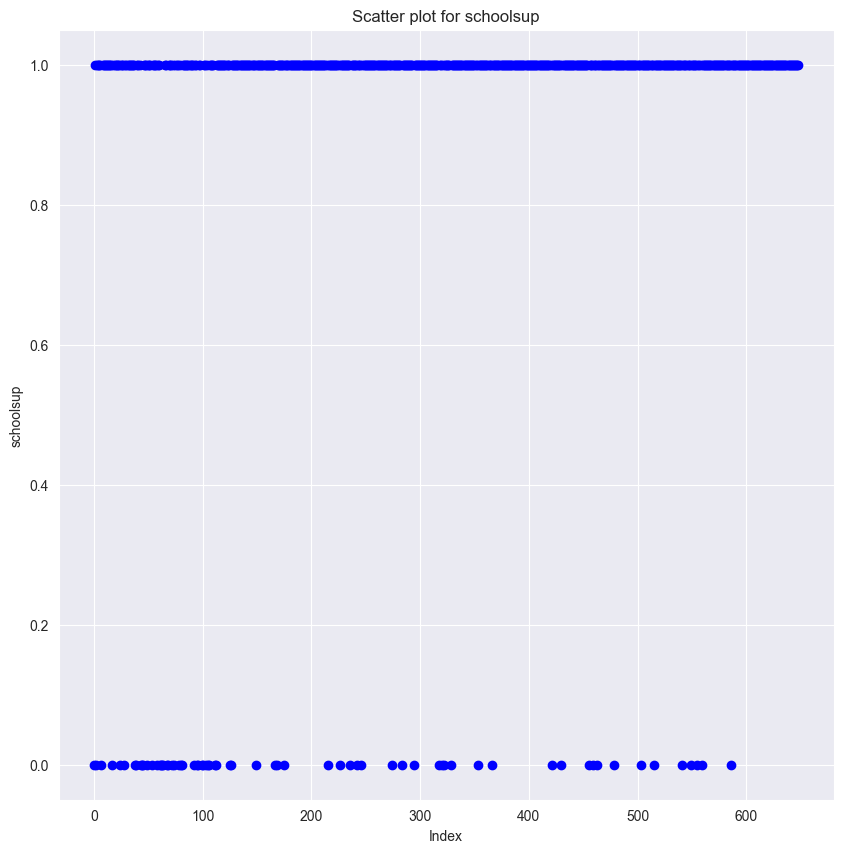

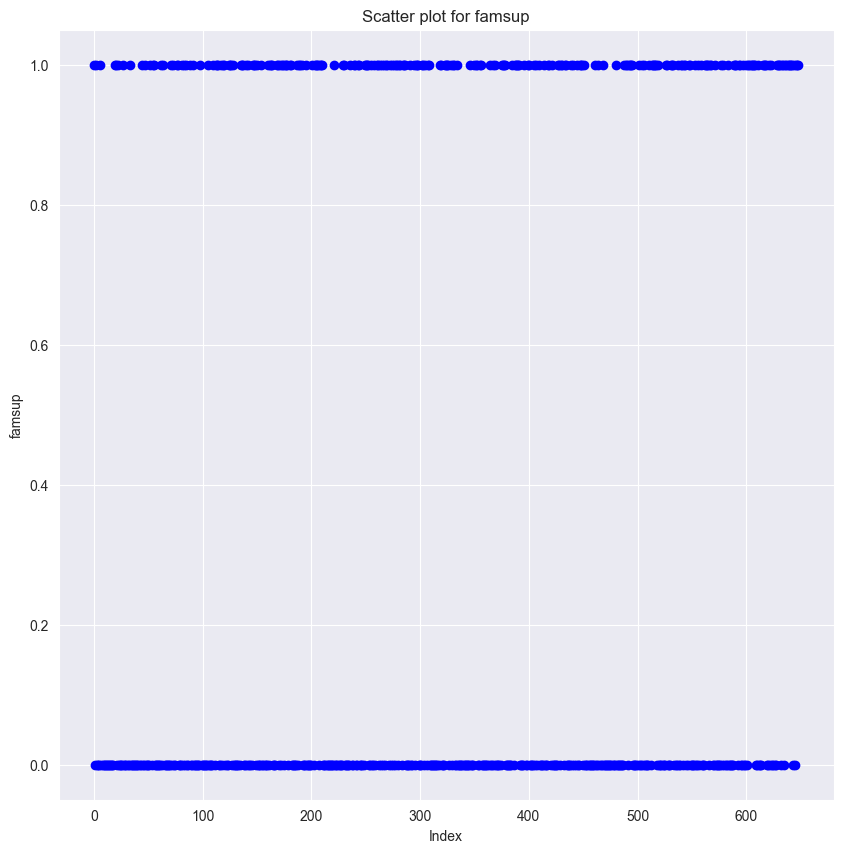

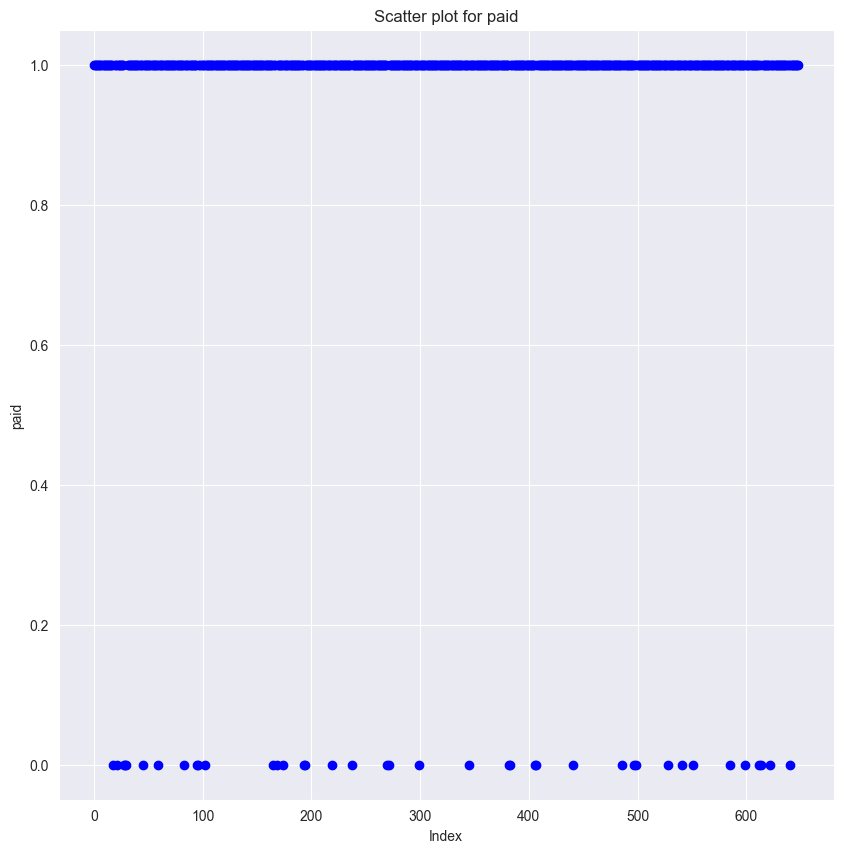

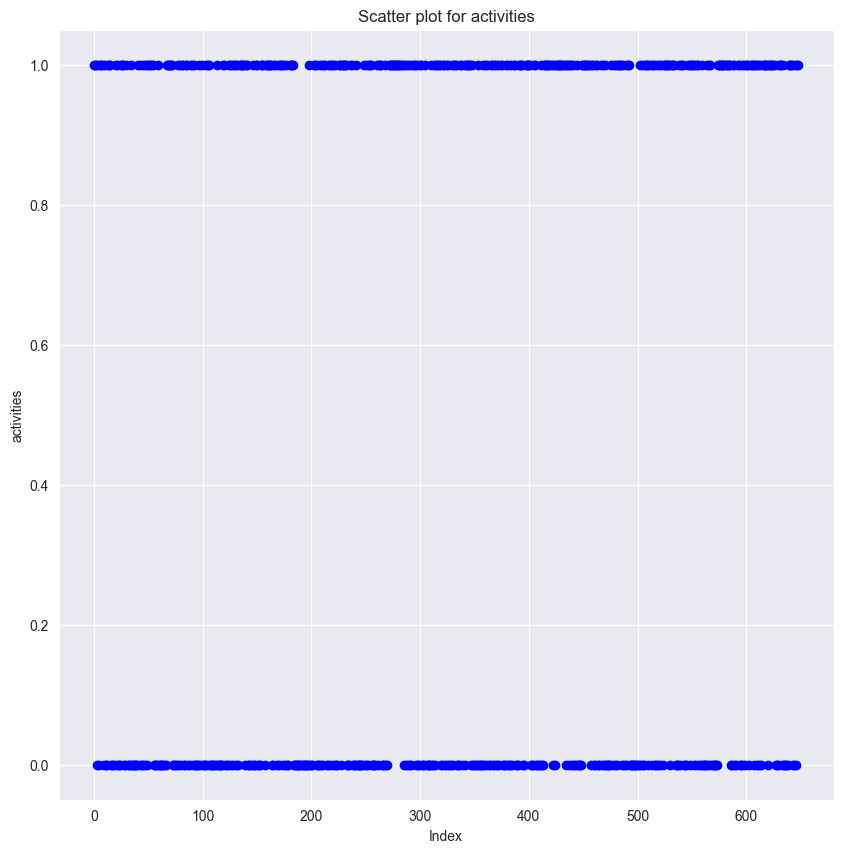

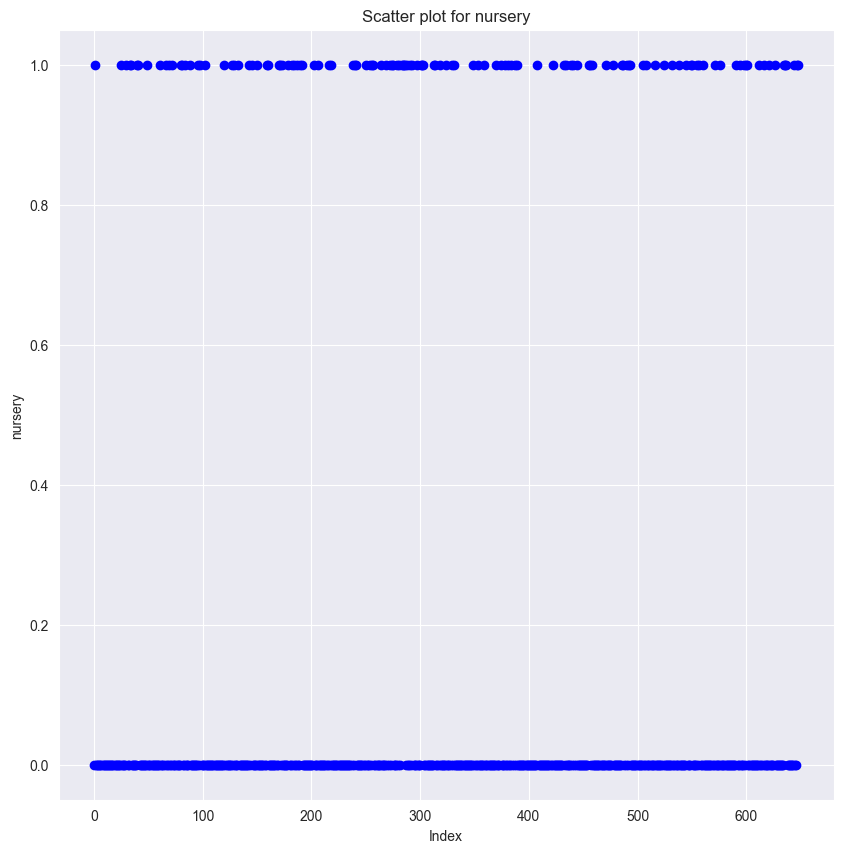

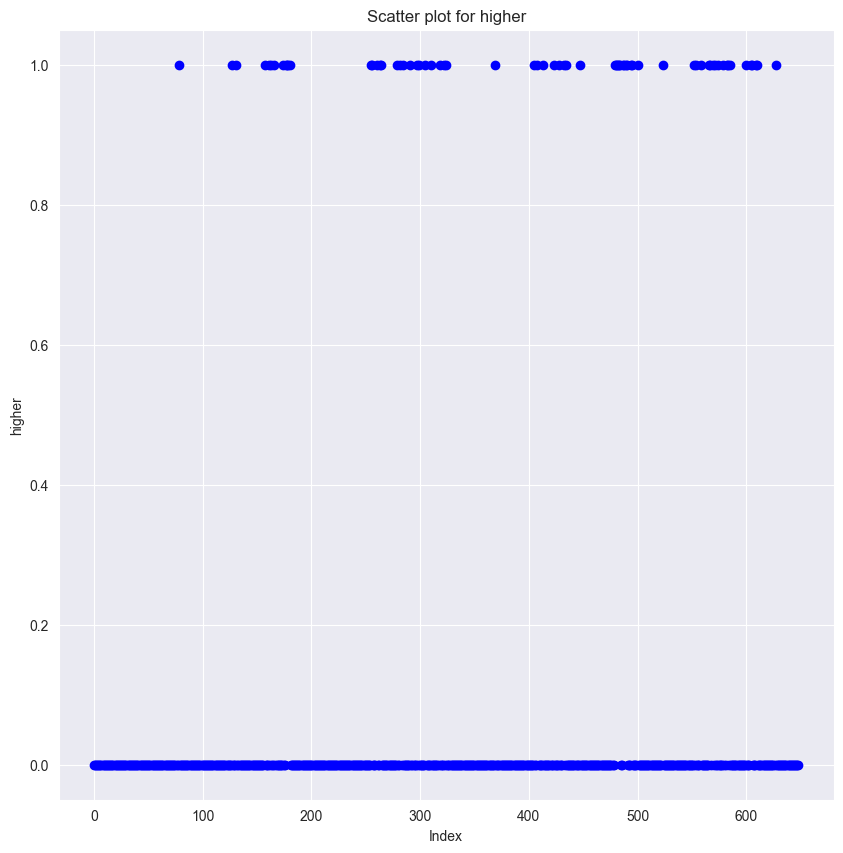

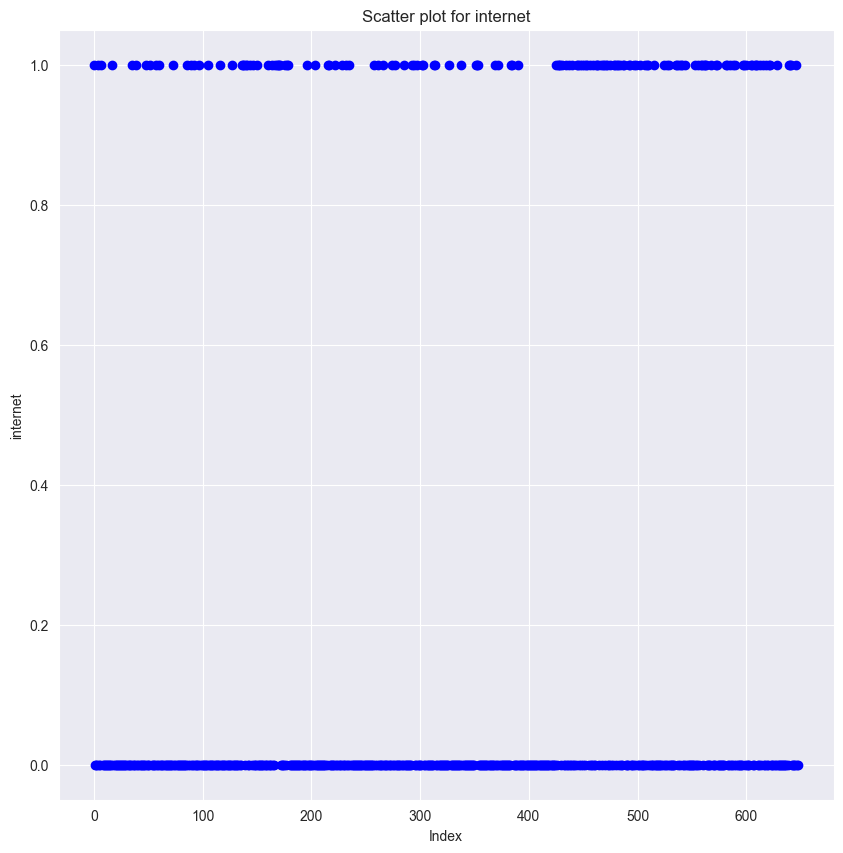

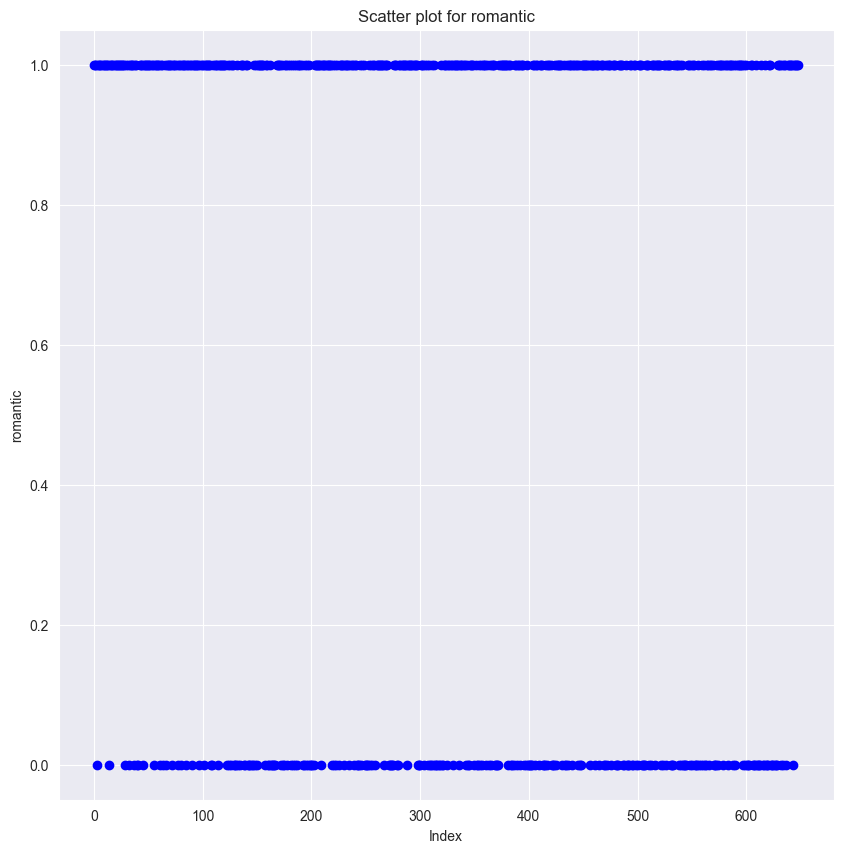

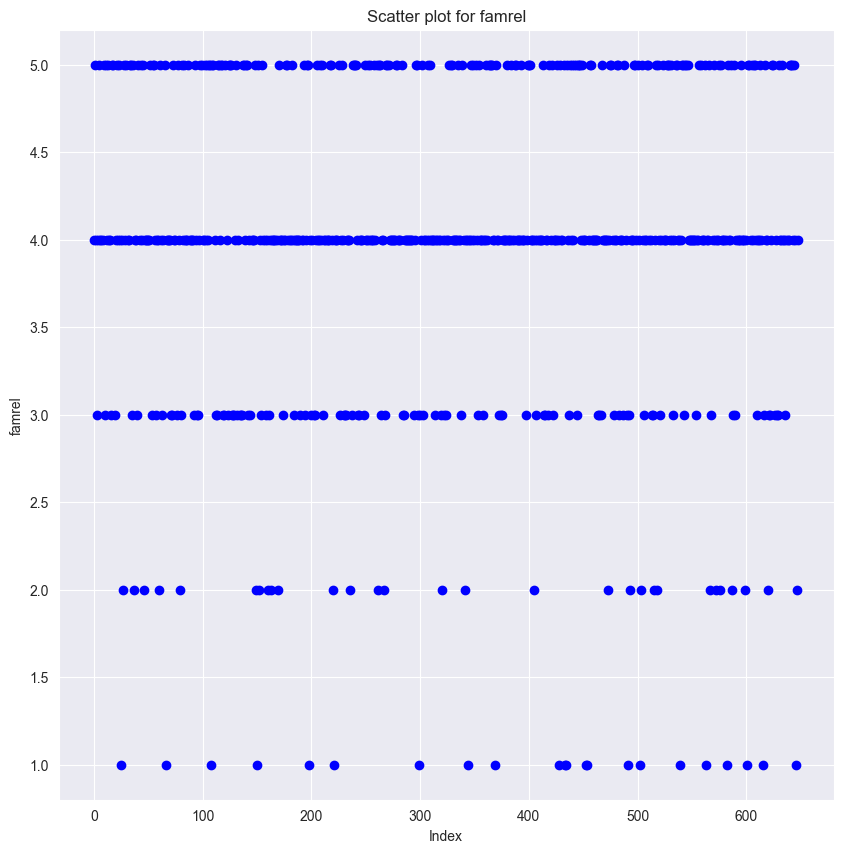

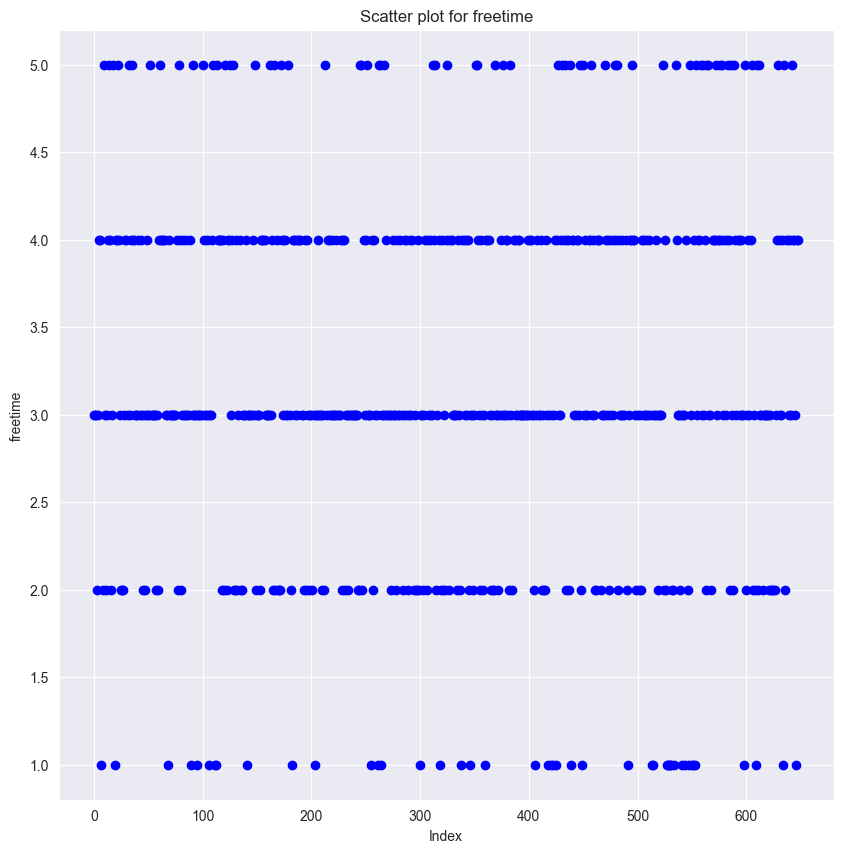

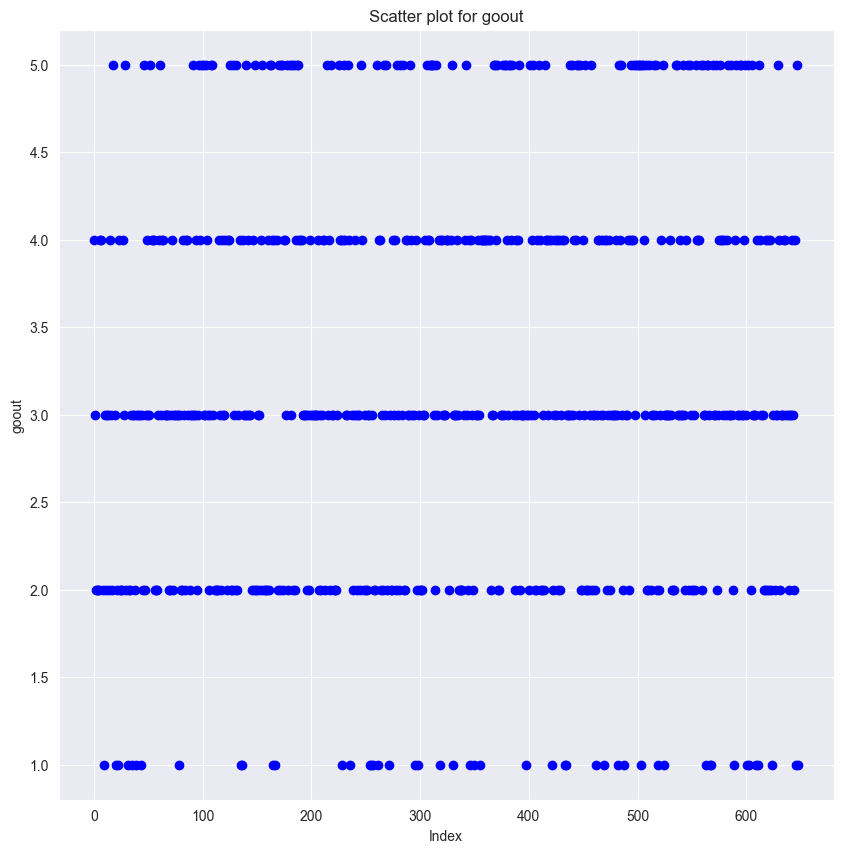

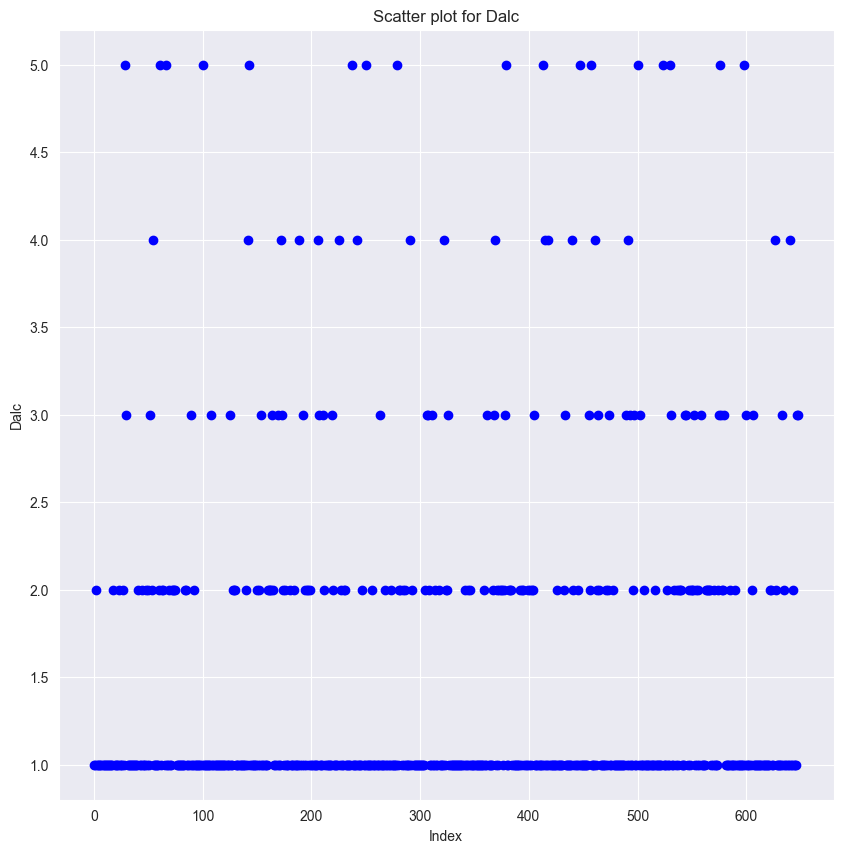

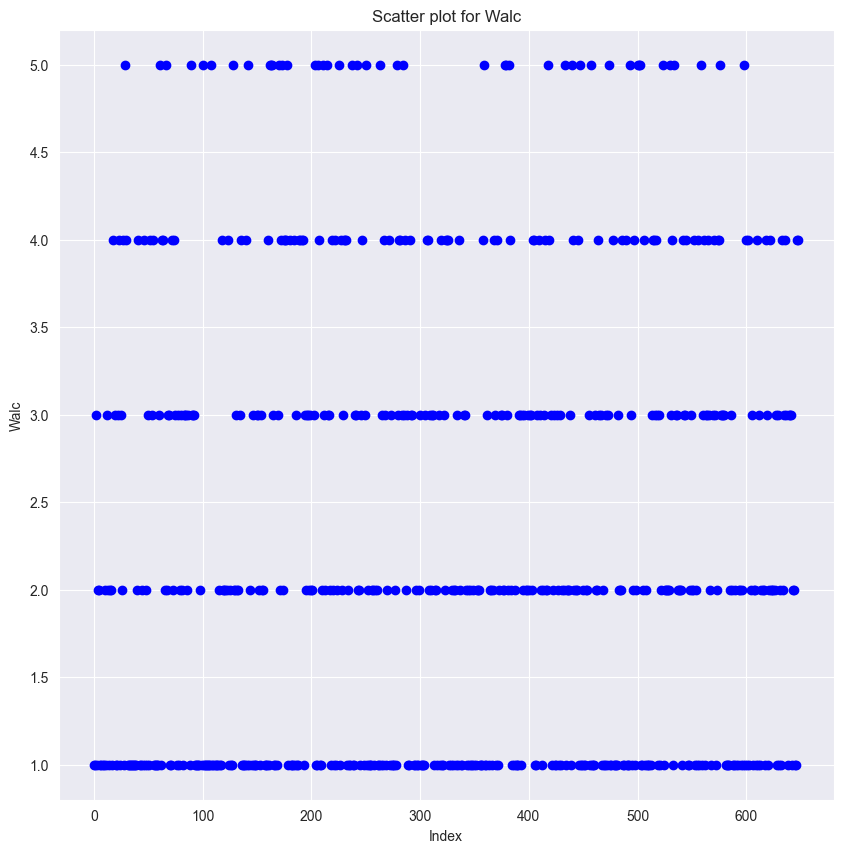

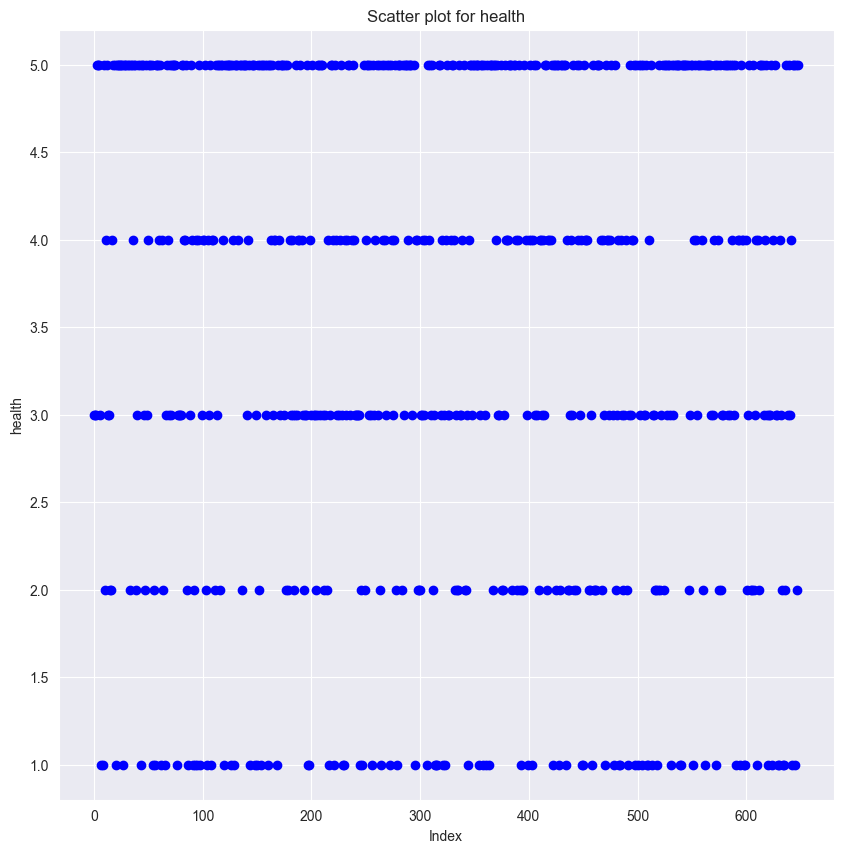

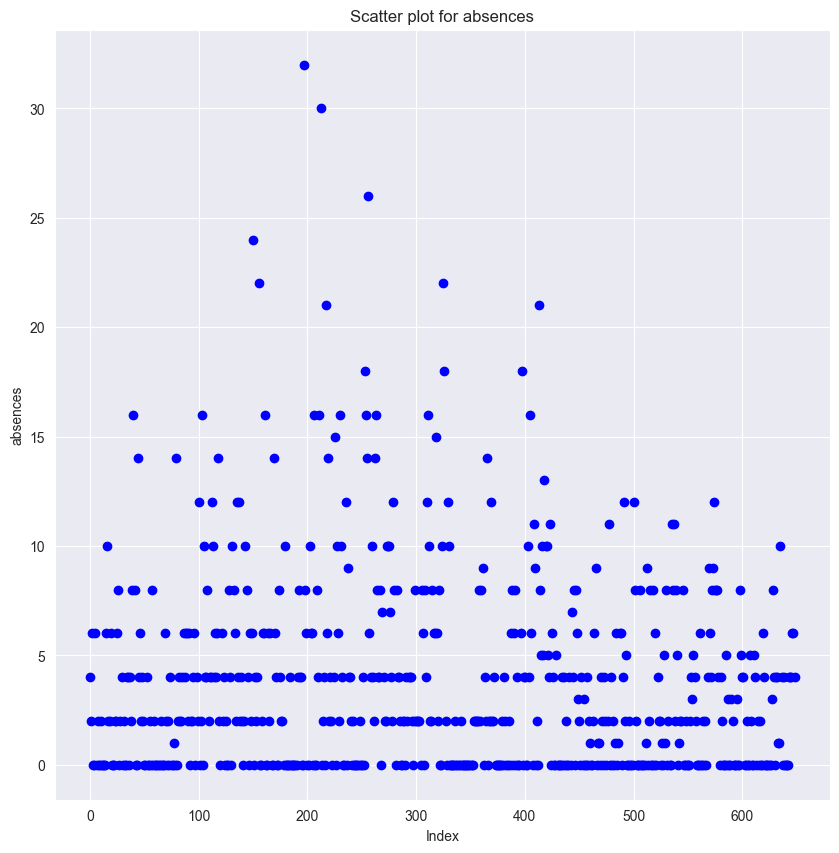

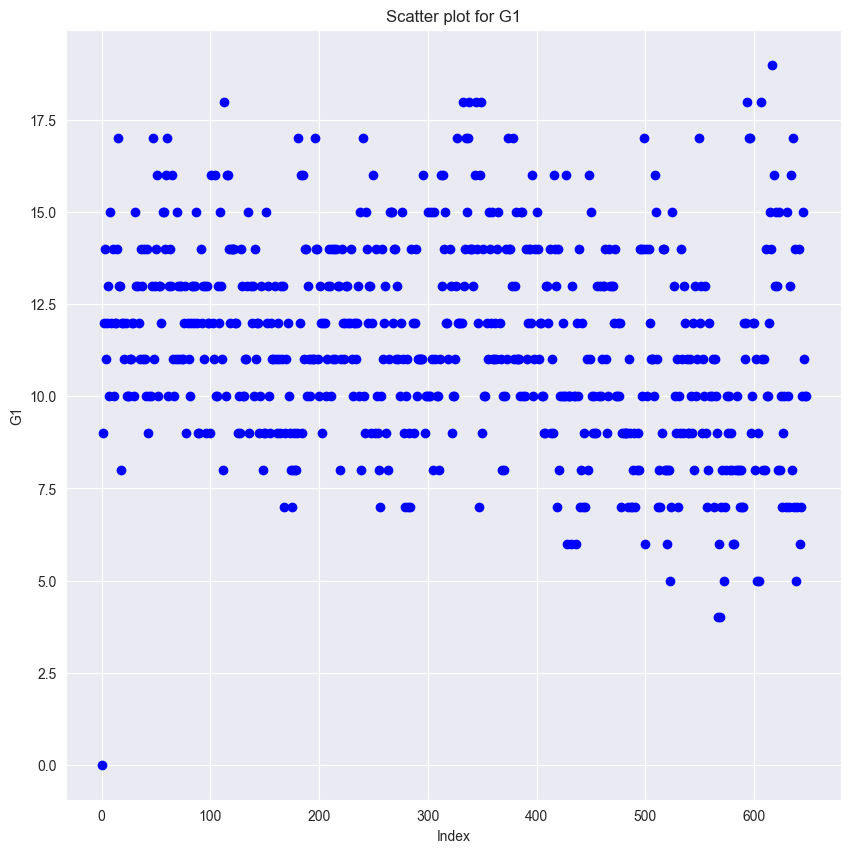

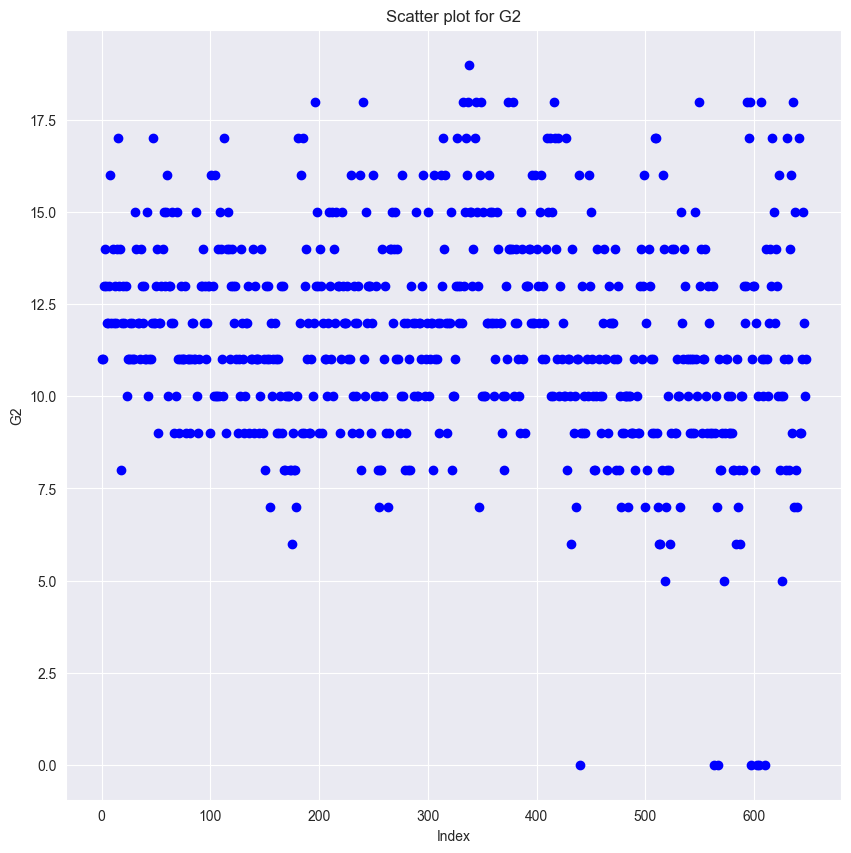

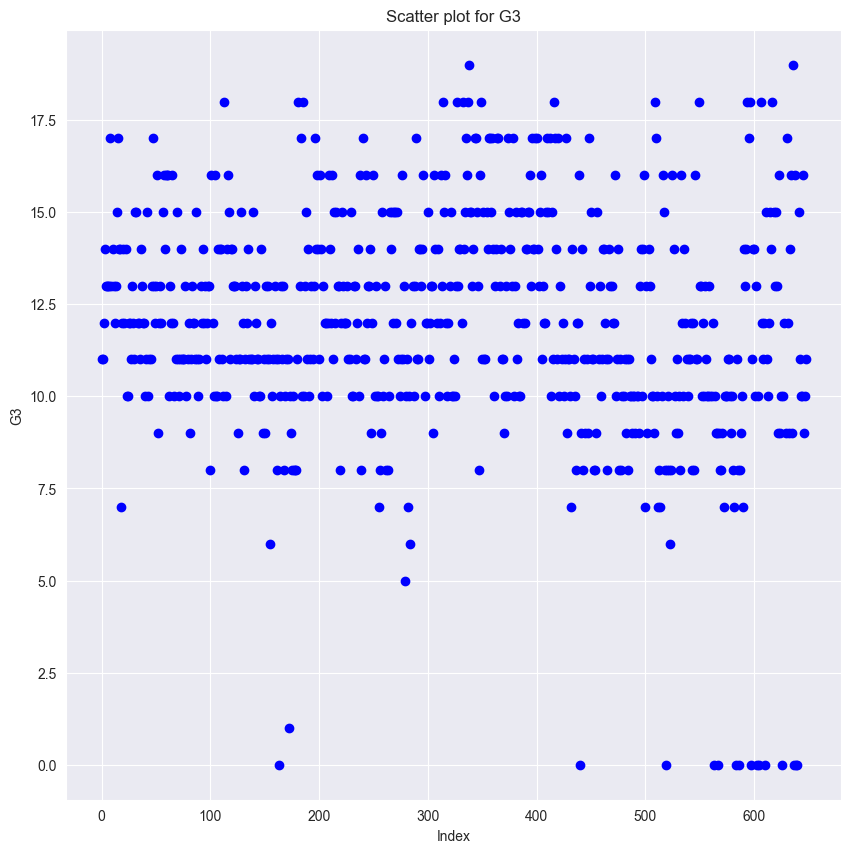

In [24]:
for column in df.columns:
    plt.figure(figsize=(10, 10), facecolor='white')
    plt.scatter(df.index, df[column], color='blue')
    plt.title(f'Scatter plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

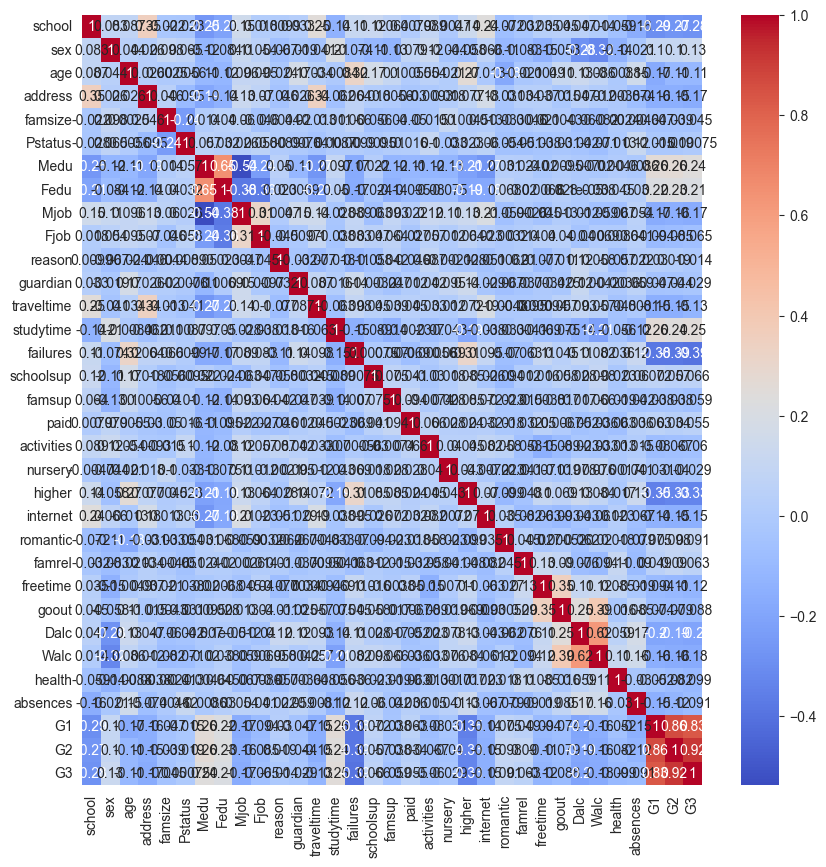

In [25]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [29]:
X = df.drop('G3', axis=1)
X.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,1,18,0,1,1,4,4,3,0,...,1,4,3,4,1,1,3,4,0,11
1,0,1,17,0,1,0,1,1,3,4,...,1,5,3,3,1,1,3,2,9,11
2,0,1,15,0,0,0,1,1,3,4,...,1,4,3,2,2,3,3,6,12,13
3,0,1,15,0,1,0,4,2,1,2,...,0,3,2,2,1,1,5,0,14,14
4,0,1,16,0,1,0,3,3,4,4,...,1,4,3,2,1,2,5,0,11,13


In [30]:
X.shape

(649, 32)

In [31]:
y = df['G3']
y.head(5)

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [32]:
type(y)

pandas.core.series.Series

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [34]:
X = sm.add_constant(X)

In [35]:
model = sm.OLS(y, X).fit()

In [36]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          6.18e-238
Time:                        12:08:07   Log-Likelihood:                -1046.8
No. Observations:                 649   AIC:                             2160.
Df Residuals:                     616   BIC:                             2307.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2410      0.929      0.260      0.7

In [37]:
type(model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [38]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.851    
Dependent Variable: G3               AIC:                2159.6890
Date:               2024-06-30 12:08 BIC:                2307.3783
No. Observations:   649              Log-Likelihood:     -1046.8  
Df Model:           32               F-statistic:        116.8    
Df Residuals:       616              Prob (F-statistic): 6.18e-238
R-squared:          0.859            Scale:              1.5532   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.2410    0.9287   0.2595  0.7953  -1.5828   2.0649
school         -0.1898    0.1238  -1.5333  0.1257  -0.4330   0.0533
sex             0.1165    0.1168   0.9974  0.3190  -0.1128   0.3458
age             0.0350    0.0465   0.7529  0.4518  -0.0564   0.1264
addres

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          6.18e-238
Time:                        12:08:16   Log-Likelihood:                -1046.8
No. Observations:                 649   AIC:                             2160.
Df Residuals:                     616   BIC:                             2307.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2410      0.929      0.260      0.795      -1.583       2.065
school        -0.1898      0.124     -1.533      0.126      -0.433       0.053
sex            0.1165      0.117      0.997      0.319      -0.113       0.346
age            0.0350      0.047      0.753      0.452      -0.056       0.126
address       -0.1503      0.121     -1.245      0.214      -0.387       0.087
famsize       -0.0209      0.114     -0.183      0.855      -0.245       0.204
Pstatus        0.1171      0.159      0.736      0.462      -0.195       0.430
Medu          -0.0969      0.067     -1.455      0.146      -0.228       0.034
Fedu           0.0402      0.063      0.640      0.523      -0.083       0.164
Mjob          -0.0971      0.046     -2.110      0.035      -0.187      -0.007
Fjob           0.0587      0.045      1.292      0.197      -0.031       0.148
reason        -0.0931      0.048     -1.930      0.054      -0.188       0.002
guardian       0.0852      0.087      0.977      0.329      -0.086       0.256
traveltime     0.1239      0.074      1.685      0.092      -0.020       0.268
studytime      0.0444      0.065      0.684      0.494      -0.083       0.172
failures      -0.2540      0.098     -2.596      0.010      -0.446      -0.062
schoolsup      0.1681      0.171      0.981      0.327      -0.169       0.505
famsup        -0.1229      0.106     -1.162      0.246      -0.331       0.085
paid           0.1463      0.214      0.684      0.494      -0.273       0.566
activities    -0.0132      0.103     -0.128      0.898      -0.216       0.189
nursery        0.0940      0.127      0.743      0.458      -0.154       0.342
higher        -0.1945      0.181     -1.074      0.283      -0.550       0.161
internet      -0.0670      0.127     -0.527      0.598      -0.316       0.182
romantic       0.0351      0.107      0.329      0.742      -0.174       0.244
famrel        -0.0283      0.054     -0.525      0.600      -0.134       0.078
freetime      -0.0472      0.052     -0.904      0.366      -0.150       0.055
goout         -0.0129      0.050     -0.258      0.796      -0.110       0.085
Dalc          -0.0529      0.071     -0.747      0.456      -0.192       0.086
Walc          -0.0267      0.055     -0.489      0.625      -0.134       0.081
health        -0.0527      0.035     -1.490      0.137      -0.122       0.017
absences       0.0164      0.012      1.418      0.157      -0.006       0.039
G1             0.1258      0.037      3.365      0.001       0.052       0.199
G2             0.8724      0.035     25.128      0.000       0.804       0.941
==============================================================================
Omnibus:                      431.661   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8573.312
Sk

In [40]:
#Εισάγει ένα dictionary το οποίο περιέχει τις τιμές κάποιων στατιστικών του μοντέλου πολλαπλής γραμμικής παλινδρόμησης
model.diagn 

{'jb': 8573.312286048185,
 'jbpv': 0.0,
 'skew': -2.639744059992697,
 'kurtosis': 20.004935440286395,
 'omni': 431.6605792395213,
 'omnipv': 1.8454241112631602e-94,
 'condno': 489.2130178758254,
 'mineigval': 1.7897568504039323}

In [41]:
#Επιστρέφει την τιμή του κριτηρίου Akaike του μοντέλου, που δείχνει την ποιότητα του μοντέλου σε σχέση με τον αριθμό των παραμέτρων του.
model.aic

2159.6889855457166

In [42]:
#Επιστρέφει την τιμή των t-values των παραμέτρων του μοντέλου. Υψηλό t-value σημαίνει ότι η παράμετρος είναι σημαντική.
model.tvalues

const          0.259549
school        -1.533337
sex            0.997421
age            0.752937
address       -1.244600
famsize       -0.182780
Pstatus        0.735702
Medu          -1.455080
Fedu           0.639819
Mjob          -2.109607
Fjob           1.291637
reason        -1.929740
guardian       0.977056
traveltime     1.685182
studytime      0.684467
failures      -2.596311
schoolsup      0.980536
famsup        -1.161872
paid           0.684485
activities    -0.127844
nursery        0.742831
higher        -1.074222
internet      -0.527287
romantic       0.329436
famrel        -0.525048
freetime      -0.903785
goout         -0.258484
Dalc          -0.746640
Walc          -0.488892
health        -1.489896
absences       1.418283
G1             3.364974
G2            25.127652
dtype: float64

In [43]:
#Επιστρέφει τα p-values των παραμέτρων του μοντέλου. Χαμηλό p-value σημαίνει ότι η παράμετρος είναι σημαντική (p-value<0.05).
model.pvalues

const         7.952986e-01
school        1.257063e-01
sex           3.189520e-01
age           4.517752e-01
address       2.137520e-01
famsize       8.550306e-01
Pstatus       4.621923e-01
Medu          1.461565e-01
Fedu          5.225283e-01
Mjob          3.529500e-02
Fjob          1.969674e-01
reason        5.409789e-02
guardian      3.289248e-01
traveltime    9.245985e-02
studytime     4.939376e-01
failures      9.647882e-03
schoolsup     3.272063e-01
famsup        2.457375e-01
paid          4.939262e-01
activities    8.983140e-01
nursery       4.578674e-01
higher        2.831437e-01
internet      5.981840e-01
romantic      7.419378e-01
famrel        5.997387e-01
freetime      3.664627e-01
goout         7.961198e-01
Dalc          4.555655e-01
Walc          6.250923e-01
health        1.367635e-01
absences      1.566139e-01
G1            8.130744e-04
G2            1.885172e-96
dtype: float64

In [44]:
#Επιστρέφει τις τιμές των residuals του μοντέλου.
model.resid

0      1.001229
1     -0.748523
2     -1.072289
3     -0.386358
4     -0.028452
         ...   
644   -1.146742
645    0.186815
646   -3.582236
647   -0.318092
648   -0.160708
Length: 649, dtype: float64

In [45]:
#Δίνει περιγραφικά στατιστικά στοιχεία για τις τιμές των residuals του μοντέλου.
pd.Series(model.resid).describe().round(2)

count    649.00
mean      -0.00
std        1.22
min       -8.83
25%       -0.51
50%        0.00
75%        0.62
max        5.49
dtype: float64

In [46]:
#Επιστρέψει το άθροισμα των τετραγωνικών καταλοίπων του μοντέλου.
model.ssr

956.785033188871

In [47]:
#Δίνει ένα καινούριο DataFrame με δυο στήλες όπου στη μια στήλη είναι οι πραγματικές τιμές του y και στην άλλη οι προβλεπόμενες τιμές του y 
compare_pred_df = pd.DataFrame({'actual_y': y, 'y_hat':model.fittedvalues})

#Επιστρέφει τι πρώτες 10 γραμμές του DataFrame
compare_pred_df.head(10)

,actual_y,y_hat
0,11,9.998771
1,11,11.748523
2,12,13.072289
3,14,14.386358
4,13,13.028452
5,13,12.394337
6,13,12.286783
7,13,12.972902
8,17,16.555516
9,13,12.082331


# <span style="color:red">ΔΙΑΓΡΑΜΜΑΤΑ ΠΟΛΛΑΠΛΗΣ ΠΛΑΙΝΔΡΟΜΗΣΗΣ

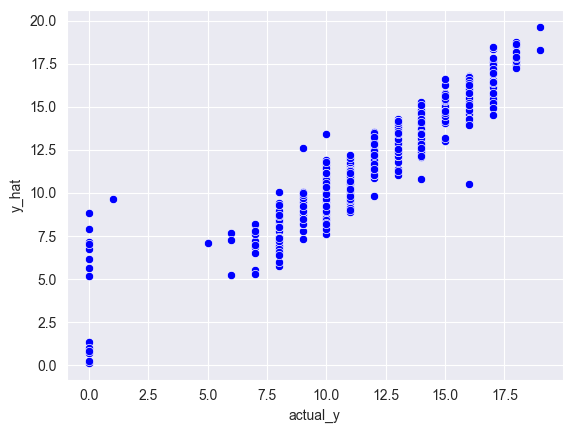

In [48]:
#Δημιουργεί ένα διάγραμμα αποκατανομής με τις πραγματικές τιμές του y στον άξονα x και τις προβλεπόμενες τιμές του y στον άξονα y
sns.scatterplot(x="actual_y", y="y_hat", color="b", data=compare_pred_df);

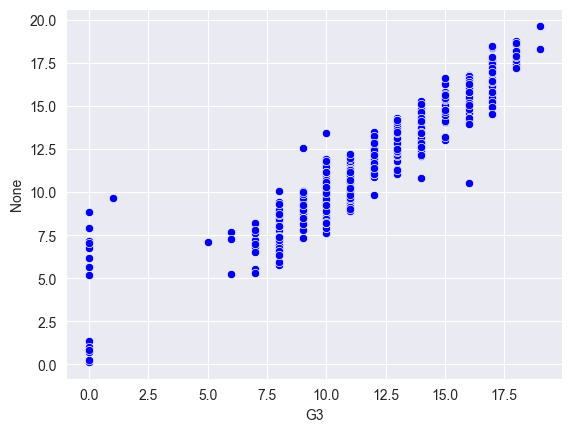

In [49]:
#Δημιουργεί ένα διάγραμμα διασποράς με τις πραγματικές τιμές της εξαρτημένης μεταβλητής TenYearCHD στον άξονα x και τις προβλεπόμενες τιμές της στον άξονα y
sns.scatterplot(x=y, y=model.fittedvalues, color="b");

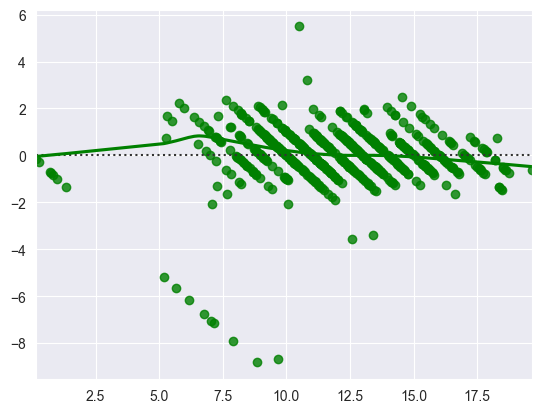

In [50]:
#Δημιουργεί ένα διάγραμμα των τετραγωνικών καταλοίπων του μοντέλου σε σχέση με τις προβλεπόμενες τιμές του y
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color="g");

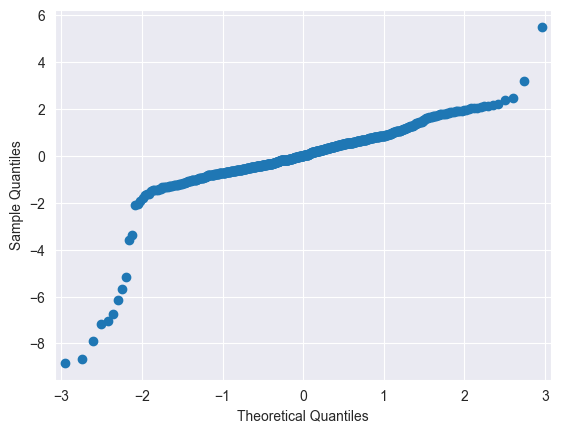

In [51]:
#Δημιουργεί ένα Q-Q plot για τις τιμές των residuals του μοντέλου ώστε να διαπιστωθεί αν ακολουθούν κανονική κατανομή
sm.qqplot(model.resid)
plt.show()

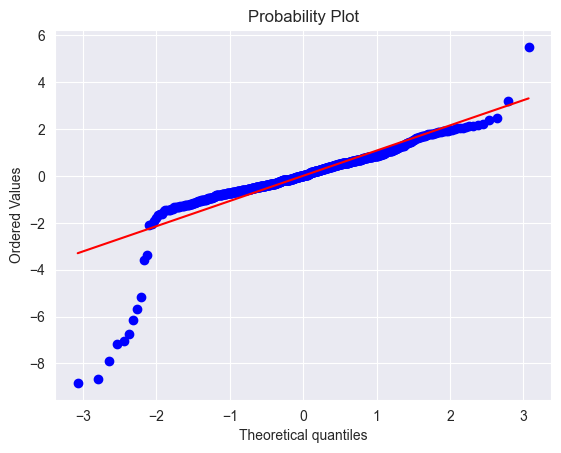

In [52]:
#Δημιουργεί ένα διάγραμμα πυκνότητας πιθανότητας για τις τιμές των residuals του μοντέλου για να διαπιστωθεί αν ακολουθούν κανονική κατανομή
stats.probplot(model.resid, plot=sns.mpl.pyplot);

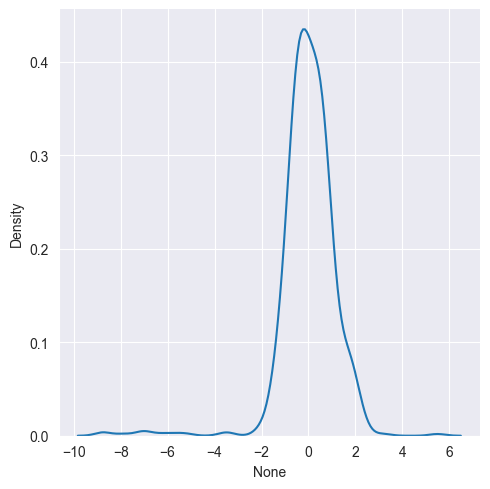

In [53]:
#Δημιουργεί ένα διάγραμμα κατανομής των καταλοίπων του μοντέλου που δείχνει πως κατανέμονται οι τιμές τους 
sns.displot(x=model.resid, kind="kde");

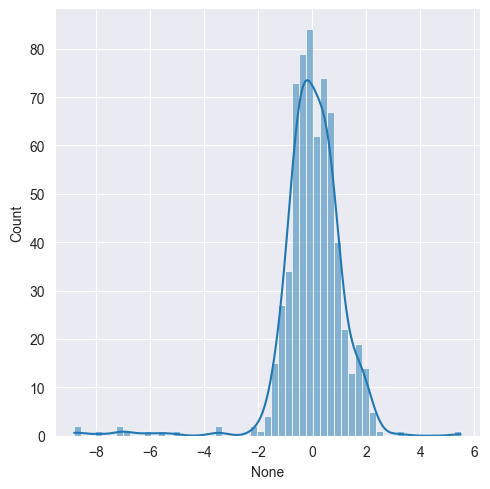

In [54]:
##Δημιουργεί ένα διάγραμμα κατανομής των καταλοίπων του μοντέλου που δείχνει πως κατανέμονται οι τιμές τους δημιουργώντας, επιπλέον, ένα ιστόγραμμα κάτω από την καμπύλη κατανομής 
sns.displot(x=model.resid, kde=True);

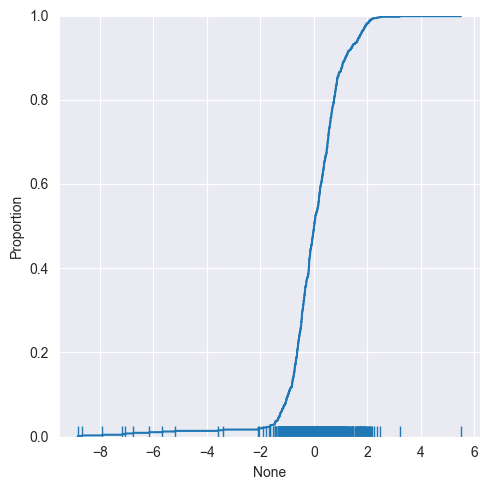

In [55]:

#Δημιουργεί ένα γράφημα αθροιστικής κατανομής των καταλοίπων του μοντέλου που δείχνει πως κατανέμονται οι τιμές τους
sns.displot(x=model.resid, kind="ecdf", rug=True);

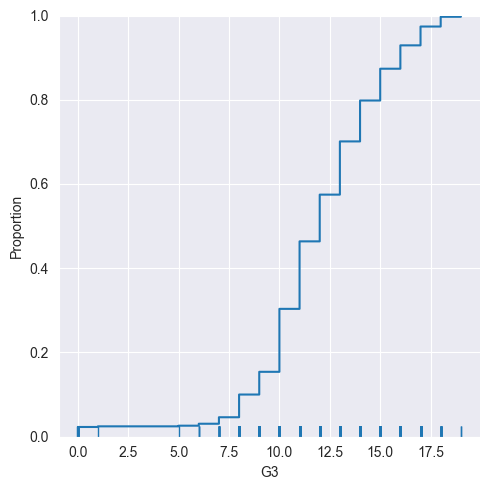

In [56]:
#Δημιουργεί ένα γράφημα αθροιστικής κατανομής των καταλοίπων του μοντέλου που δείχνει πως κατανέμονται οι τιμές τους χρησιμοποιώντας ευθείες αντί για συνεχή γραμμή
sns.displot(x=y, kind="ecdf",  rug=True);

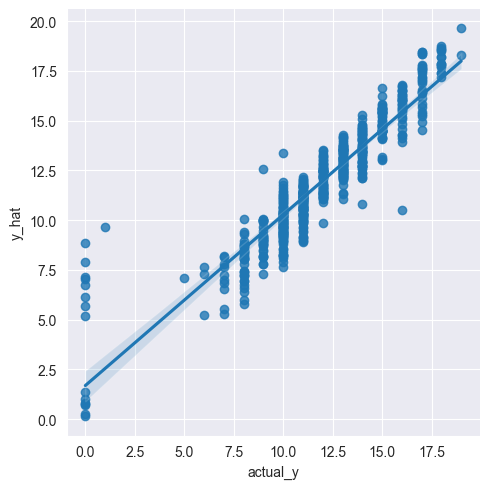

In [57]:
# Μετατρέπει τα 'actual_y' και 'y_hat' σε αριθμητικές τιμές από αλφαριθμητικές
compare_pred_df['actual_y'] = pd.to_numeric(compare_pred_df['actual_y'])
compare_pred_df['y_hat'] = pd.to_numeric(compare_pred_df['y_hat'])

# Δημιουργεί ένα γράφημα διασποράς μεταξύ των πραγματικών τιμών και των προβλεπόμενων τιμών του y με την ένταξη της γραμμής της ευθείας παλινδρόμησης στο γράφημα
sns.lmplot(x="actual_y", y="y_hat", data=compare_pred_df)

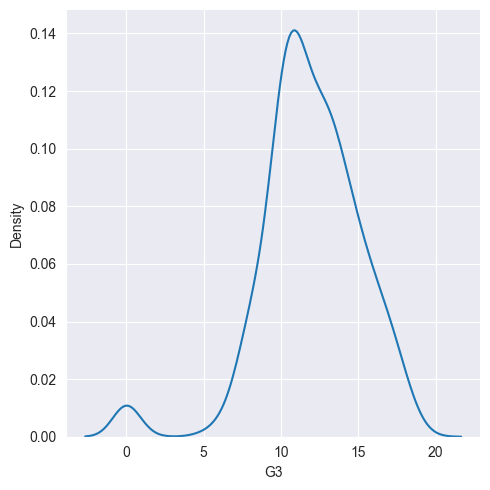

In [58]:
#Μετατρέπει το 'y' σε αριθμητικές τιμές από αλφαριθμητικές
y = pd.to_numeric(y, errors='coerce')

# Δημιουργεί το διάγραμμα κατανομής πιθανότητας της εξαρτημένης μεταβλητής TenYearCHD
sns.displot(x=y, kind="kde")
plt.show()

# <span style="color:red">ΑΦΑΙΡΕΣΗ ΜΗ ΣΤΑΤΙΣΤΙΚΑ ΣΗΜΑΝΤΙΚΩΝ ΜΕΤΑΒΛΗΤΩΝ ΑΠΟ ΤΟ ΜΟΝΤΕΛΟ


In [59]:
# Επαναπροσδιορισμός του μοντέλου με τις σημαντικότερες μεταβλητές
X = df[['Mjob','failures','G1','G2']]
X = sm.add_constant(X)

# Δημιουργία του μοντέλου πολλαπλής γραμμικής παλινδρόμησης
ols_results = sm.OLS(y, X).fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     907.3
Date:                Sun, 30 Jun 2024   Prob (F-statistic):          6.25e-263
Time:                        12:14:36   Log-Likelihood:                -1067.4
No. Observations:                 649   AIC:                             2145.
Df Residuals:                     644   BIC:                             2167.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2300      0.276      0.833      0.405      -0.312       0.772
Mjob          -0.0401      0.037     -1.079      0.281      -0.113       0.033
failures      -0.2085      0.091     -2.295      0.022      -0.387      -0.030
G1             0.1373      0.036      3.798      0.000       0.066       0.208
G2             0.8872      0.034     26.067      0.000       0.820       0.954
==============================================================================
Omnibus:                      470.300   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10715.296
Skew:                          -2.942   Prob(JB):                         0.00
Kurtosis:                      22.017   Cond. No.                         95.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <span style="color:red">ΛΟΓΙΣΤΙΚΗ ΠΑΛΙΝΔΡΟΜΗΣΗ (PINGOUIN)

In [13]:
df['G3'] = df['G3'].apply(lambda x: 1 if x > 10 else 0)

In [14]:
# Μετατροπή των τιμών των στηλών του dataset σε float
data = df.astype(float)  

In [15]:
#Διαχωρισμός των δεδομένων σε χαρακτηριστικά (Independent Variables) και target variable (Dependent Variable)
X = data.drop("G3", axis=1)
y = data["G3"]

In [16]:
#Διαχωρισμός των δεδομένων σε σύνολα εκπαίδευσης και δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [17]:
#Δημιουργία και εκπαίδευση του μοντέλου λογιστικής παλινδρόμησης
y = data["G3"]
lr = pg.logistic_regression(X, y, penalty="l2" ).round(3)
lr

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-23.338,4.086,-5.712,0.000,-31.346,-15.331
1,school,-0.862,0.411,-2.097,0.036,-1.667,-0.056
2,sex,0.266,0.406,0.654,0.513,-0.530,1.062
3,age,0.156,0.157,0.994,0.320,-0.151,0.463
4,address,-0.068,0.391,-0.174,0.862,-0.834,0.698
5,famsize,0.179,0.384,0.465,0.642,-0.575,0.932
6,Pstatus,0.166,0.545,0.304,0.761,-0.903,1.234
7,Medu,0.108,0.219,0.494,0.621,-0.321,0.538
8,Fedu,0.089,0.210,0.424,0.671,-0.322,0.500
9,Mjob,-0.080,0.165,-0.486,0.627,-0.405,0.244


In [18]:
#Δίνει τον πίνακα που περιέχει τις τιμές των coefficients του μοντέλου λογιστικής παλινδρόμησης
pg.logistic_regression(X.to_numpy(), y.to_numpy(),penalty="l2", coef_only=True)

array([-2.33383807e+01, -8.61649838e-01,  2.65714204e-01,  1.56013363e-01,
       -6.79204895e-02,  1.78561165e-01,  1.65614276e-01,  1.08220762e-01,
        8.89215762e-02, -8.04006074e-02,  1.77216185e-01,  3.53491930e-01,
        3.67037982e-01,  3.43740521e-01, -3.23329051e-02, -7.46984588e-01,
        4.10417979e-01,  9.43503337e-02, -2.64556324e-01,  3.09929401e-01,
        3.86893327e-01, -2.79577186e-01,  1.71831624e-01,  3.70932903e-01,
       -2.43921370e-01, -7.57464069e-02,  1.13567053e-01, -3.73565593e-02,
       -3.15627594e-03, -1.54161543e-03, -9.78493190e-02,  3.36137390e-01,
        1.64504717e+00])

# <span style="color:red">ΠΡΟΓΡΑΜΜΑ ΑΠΟΤΕΛΕΣΜΑΤΙΚΟΤΗΤΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ

In [19]:
##Διαχωρισμός των δεδομένων σε χαρακτηριστικά (Independent Variables) και target variable (Dependent Variable) και ορισμό σταθεράς στο μοντέλο λογιστικής παλινδρόμησης
X = df.drop('G3', axis=1)
y = df['G3']
X = sm.add_constant(X, prepend=False)

In [20]:
#Δημιουργία και εκπαίδευση του μοντέλου λογιστικής παλινδρόμησης
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print("Parameters:\n",logit_res.params)

Parameters:
 school        -1.092177
sex            0.367600
age            0.176438
address       -0.044542
famsize        0.203599
Pstatus        0.236706
Medu           0.105821
Fedu           0.071289
Mjob          -0.083197
Fjob           0.186041
reason         0.393285
guardian       0.418514
traveltime     0.402121
studytime     -0.037392
failures      -0.869065
schoolsup      0.621824
famsup         0.115059
paid          -0.461977
activities     0.379005
nursery        0.477729
higher        -0.379139
internet       0.219563
romantic       0.454453
famrel        -0.254945
freetime      -0.068634
goout          0.119661
Dalc          -0.040102
Walc           0.010175
health        -0.005250
absences      -0.106428
G1             0.318071
G2             1.760638
const        -24.866990
dtype: float64


In [21]:
#Δημιουργία ενός Identity Matrix με τις διαστάσεις του πίνακα των παραμέτρων του μοντέλου λογιστικής παλινδρόμησης που παίρνει τιμή 1 σε όλες τις διαγώνιες θέσεις εκτός από την πρώτη και διαλέγει όλες τις γραμμές εκτός της πρώτης
A = np.identity(len(logit_res.params))
A = A[1:,:]

In [22]:
#Εκτελεί ένα F-test για τον έλεγχο της σημαντικότητας των παραμέτρων του μοντέλου λογιστικής παλινδρόμησης που έχει πάρει ως όρισμα τον πίνακα A. Παίρνουμε το p-value και το F-value του τεστ.
logit_res.f_test(A)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=3.29722032792686, p=7.0208549124577235e-09, df_denom=616, df_num=32>

In [23]:
#Δίνει τη μεταβολή της εξαρτημένης μεταβλητής TenYearCHD για κάθε μονάδα αύξησης της κάθε ανεξάρτητης μεταβλητής όταν οι άλλες παραμένουν σταθερές
margeff = logit_res.get_margeff()
print(margeff.summary())

        Logit Marginal Effects       
Dep. Variable:                     G3
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
school        -0.0620      0.023     -2.650      0.008      -0.108      -0.016
sex            0.0209      0.024      0.883      0.377      -0.025       0.067
age            0.0100      0.009      1.088      0.277      -0.008       0.028
address       -0.0025      0.023     -0.111      0.912      -0.047       0.042
famsize        0.0115      0.022      0.516      0.606      -0.032       0.055
Pstatus        0.0134      0.031      0.427      0.669      -0.048       0.075
Medu           0.0060      0.013      0.471      0.638      -0.019       0.031
Fedu           0.0040      0.012      0.331      0.741      -0.020       0.028
Mjob          -0.0047      0.010     -0.490      0.624    

In [24]:
#Δίνει το σύνολο των αποτελεσμάτων του μοντέλου λογιστικής παλινδρόμησης που περιέχει τις τιμές των παραμέτρων, τα p-values, τα t-values και τα confidence intervals
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                     G3   No. Observations:                  649
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                           32
Date:                Sun, 30 Jun 2024   Pseudo R-squ.:                  0.7012
Time:                        12:32:53   Log-Likelihood:                -119.05
converged:                       True   LL-Null:                       -398.38
Covariance Type:            nonrobust   LLR p-value:                 1.938e-97
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
school        -1.0922      0.426     -2.565      0.010      -1.927      -0.258
sex            0.3676      0.418      0.880      0.379      -0.451       1.187
age            0.1764      0.163      1.080      0.2

In [25]:
#Υπολογίζει τις πιθανότητες για την εξαρτημένη μεταβλητή TenYearCHD
pred_probs = logit_res.predict(X)

In [26]:
#Δίνει τις πιθανότητες για την εξαρτημένη μεταβλητή TenYearCHD
print(logit_res.predict(X)) 

0      0.301492
1      0.919953
2      0.997063
3      0.999853
4      0.999485
         ...   
644    0.578625
645    0.999935
646    0.977742
647    0.465046
648    0.858945
Length: 649, dtype: float64


In [27]:
#Δημιουργεί μια νέα μεταβλητή με βάση τις πιθανότητες που υπολόγισε το μοντέλο λογιστικής παλινδρόμησης και ελέγχει αν η πιθανότητα είναι μεγαλύτερη από 0.5
pred_labels = (pred_probs > 0.5).astype(int)

In [28]:
# Υπολογίζει την ακρίβεια του μοντέλου λογιστικής παλινδρόμησης 
accuracy = np.mean(pred_labels == y)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.9244992295839753


# <span style="color:red">ΔΗΜΙΟΥΡΓΙΑ PIPELINE ΓΙΑ ΤΟΝ ΥΠΟΛΟΓΙΣΜΟ ΤΗΣ ΑΚΡΙΒΕΙΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ

In [29]:
# Δημιουργία του pipeline
pipeline = Pipeline([  
('preprocessing', StandardScaler()), # Προεπεξεργασία δεδομένων με StandardScaler   
('feature_selection', SelectKBest(k=10)),  #Δοκιμάζουμε με διαφορετικό αριθμό χαρακτηριστικών για να βρούμε την καλύτερη ακρίβεια. Εδώ έχουμε βάλει 10 χαρακτηριστικά
 ('model', LogisticRegression()) ]) # Εκτίμηση με λογιστική παλινδρόμηση 

# Εκπαίδευση του μοντέλου
pipeline.fit(X_train, y_train)

# Πρόβλεψη σε νέα δεδομένα
y_pred = pipeline.predict(X_test)

In [30]:
#Υπολογισμός της ακρίβειας του μοντέλου με τη χρήση της μεθόδου score
accuracy = pipeline.score(X_test, y_test)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9387755102040817
